<a href="https://colab.research.google.com/github/Uzumaki17/Bike-Sharing-Demand-Prediction/blob/main/Bike_Price_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member-** Jambay Yeshi

# **Project Summary -**

Rental bikes have been introduced in many urban cities to improve mobility and reduce waiting times. However, ensuring a stable supply of rental bikes is a major challenge. A crucial part of this is to predict the number of bikes needed at each hour.

We first imported the necessary libraries and examined our data. The dataset contains 8760 rows and 14 columns, with no duplicate or missing data. We then studied the features and the data they represent.

We found that the Date column was in the object datatype, so we converted it to the datetime datatype. We then extracted the Date, month, year, and week number from the Date column. We dropped the Date column and renamed the columns for clarity.

We plotted various charts and gained useful insights. Based on our visualizations, we formulated three hypotheses and performed hypothesis tests. The hypotheses were:

- The average number of bikes in Seoul at any given time is greater than 100.
- The average temperature in Seoul at any given time is greater than 10 degrees Celsius.
- The standard deviation of humidity in Seoul is 20.

We then performed one-hot encoding on our categorical features, dropping the first column (which was always true). We found that our dependent variable, Rented_bike_count, was right-skewed. To address this, we applied a square root transformation to normalize the distribution. We then scaled our data using MinMax scaling. Finally, we split our data into training and test sets in an 80:20 ratio.

The data was now ready to be fit into a machine learning model. We implemented several models and calculated various statistical metrics to evaluate their performance.

We found that the Random Forest Regressor model performed the best. This model can be used by bike rental companies to predict the demand for city bikes at a particular hour, which can help them meet demand more accurately.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The goal of this project is to develop a machine learning model that can precisely predict the demand for rental bikes at different times of the day, taking into account a variety of factors such as weather, traffic, and public events. This will enable cities to optimize their bike-sharing systems by ensuring that there are always enough bikes available when they are most needed, minimizing wait times for users and maximizing the efficiency of the bike-sharing system as a whole.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [168]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [169]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [170]:
# Dataset First Look
file_path = "/content/drive/MyDrive/Bike_Sharing_Demand_Prediction_Project/SeoulBikeData.csv"
bike_data = pd.read_csv(file_path, encoding = 'ISO-8859-1')

bike_data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [171]:
# Dataset Rows & Columns count
row,col = bike_data.shape
print(f'Rows: {row}, Columns: {col}')


Rows: 8760, Columns: 14


### Dataset Information

In [172]:
# Dataset Info
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [173]:
# Dataset Duplicate Value Count
dup_count = bike_data.duplicated().sum()
print(f'Duplicate value count: {dup_count}')

Duplicate value count: 0


#### Missing Values/Null Values

In [174]:
# Missing Values/Null Values Count
missing_val_count = bike_data.isnull().sum()
missing_val_count

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Axes: >

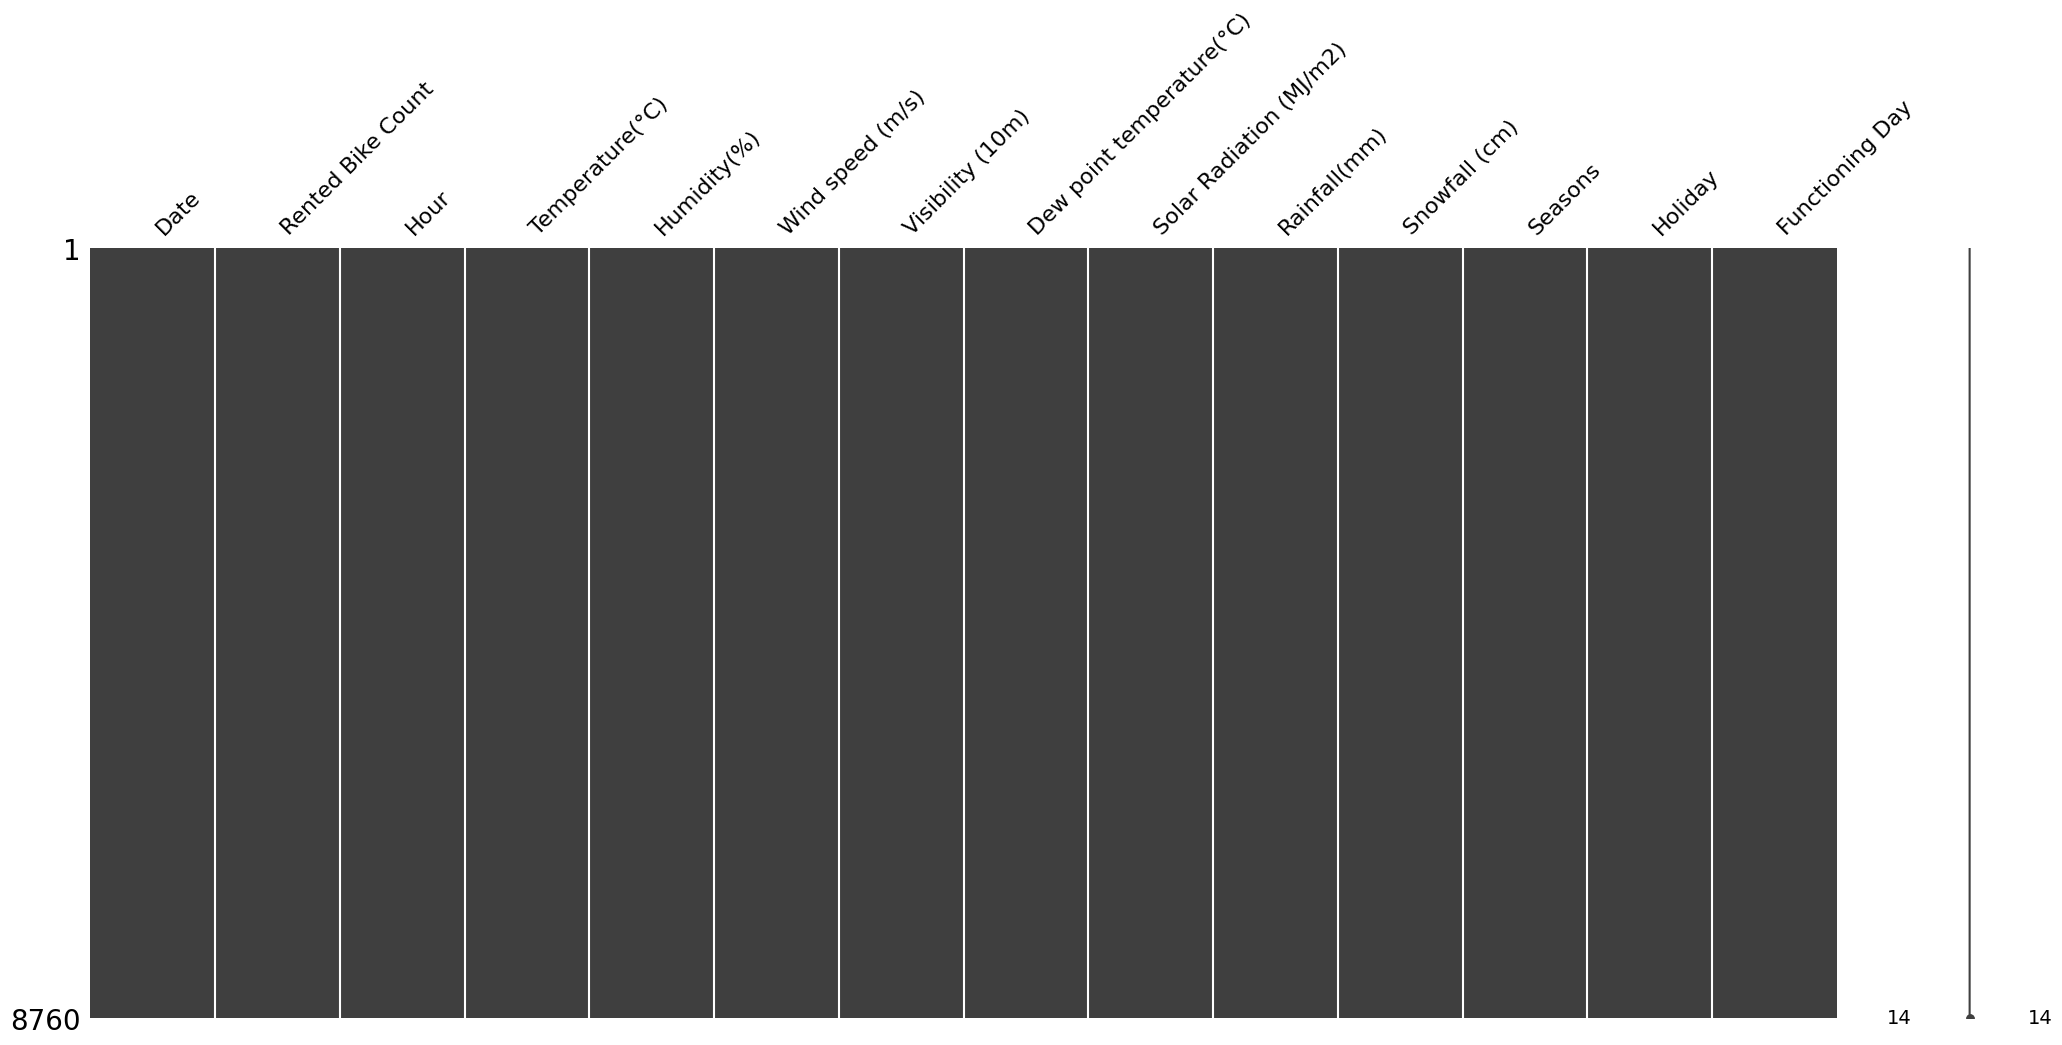

In [175]:
# Visualizing the missing values
msno.matrix(bike_data)

### What did you know about your dataset?

Columns Information:

**Date** has information about date in format year-month-day

**Rented Bike count** has information about Count of bikes rented at each hour

**Hour** - Hour of the day (0 to 23)

**Temperature**- Temperature in Celsius

**Humidity** - humidity with respect to the given hour on the given date (in %)

**Windspeed** - Windspeed with respect to the given hour on the given date (in m/s)

**Visibility** - Visibility with respect to the given hour on the given date (upto 10m)

**Dew point temperature** - Dew point temperature with respect to the given hour on the given date (in Celsius)

**Solar radiation** - Solar Radition with respect to the given hour on the given date (in MJ/m2)

**Rainfall** - Rainfall with respect to the given hour on the given date (in mm)

**Snowfall** - Snowfall with respect to the given hour on the given date (in cm)

**Seasons** - various seasons that is "Winter, Spring, Summer, Autumn"

**Holiday** - if it was holiday or not, namely "Holiday" and "No holiday"

**Functional Day** - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

## ***2. Understanding Your Variables***

In [176]:
# Dataset Columns
cols = bike_data.columns
cols

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [177]:
# Dataset Describe
bike_data.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Variables Description

Answer Here

### Check Unique Values for each variable.

In [178]:
# Check Unique Values for each variable.
unique_val = []
for val in bike_data.columns:
  x=bike_data[val].nunique()
  unique_val.append(x)

df1 = pd.DataFrame(unique_val, index = bike_data.columns, columns =['Value count'])
df1

Value count
Date                               365
Rented Bike Count                 2166
Hour                                24
Temperature(°C)                    546
Humidity(%)                         90
Wind speed (m/s)                    65
Visibility (10m)                  1789
Dew point temperature(°C)          556
Solar Radiation (MJ/m2)            345
Rainfall(mm)                        61
Snowfall (cm)                       51
Seasons                              4
Holiday                              2
Functioning Day                      2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [179]:
# Write your code to make your dataset analysis ready.

#converting to proper date time format
bike_data['Date'] = pd.to_datetime(bike_data['Date'])

# creating new colums with respect to their features for future use
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month'] = bike_data['Date'].dt.month
bike_data['Day'] = bike_data['Date'].dt.day_name()
# bike_data['Week Number'] = bike_data['Date'].dt.week


#now that we have all the required date information stored in separate columns
#will drop the Date column
bike_data.drop(columns=['Date'],axis=1,inplace=True)

In [180]:
bike_data.head(3)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Year  \
0           0.0            0.0  Winter  No Holiday             Yes  2017   
1           0.0            0.0  Winter  No Holiday             Yes  2017   
2           0.0            0.0  Winter  No Holiday             Yes  2017   

   Month       Day  
0      1  Thursday  
1      1  Thursday  
2      1  Thursday

In [181]:
#Renaming the columns for better readability
bike_data.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'Wind Speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew Point Temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall'
                       }, inplace = True)

In [182]:
bike_data.head(1)

Rented Bike Count  Hour  Temperature  Humidity  Wind Speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Dew Point Temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  Year  Month       Day  
0  No Holiday             Yes  2017      1  Thursday

### What all manipulations have you done and insights you found?

OBSERVATIONS:
- No missing values
- Extracted Day,Month,Week and Year from the Date column
- Renamed all the columns

In [183]:
# Separating the data into catrgorical and numerical data
numerical_cols = list(set(bike_data.describe().columns.tolist())- {'Hour','Month'})
categorical_cols = list(set(bike_data.columns)-set(numerical_cols))

In [184]:
categorical_cols

['Seasons', 'Functioning Day', 'Day', 'Hour', 'Month', 'Holiday']

In [185]:
numerical_cols

['Temperature',
 'Rainfall',
 'Snowfall',
 'Solar Radiation',
 'Rented Bike Count',
 'Wind Speed',
 'Visibility',
 'Humidity',
 'Dew Point Temperature',
 'Year']

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
- Plotting chart for the dependent variable (Rented Bike Count)

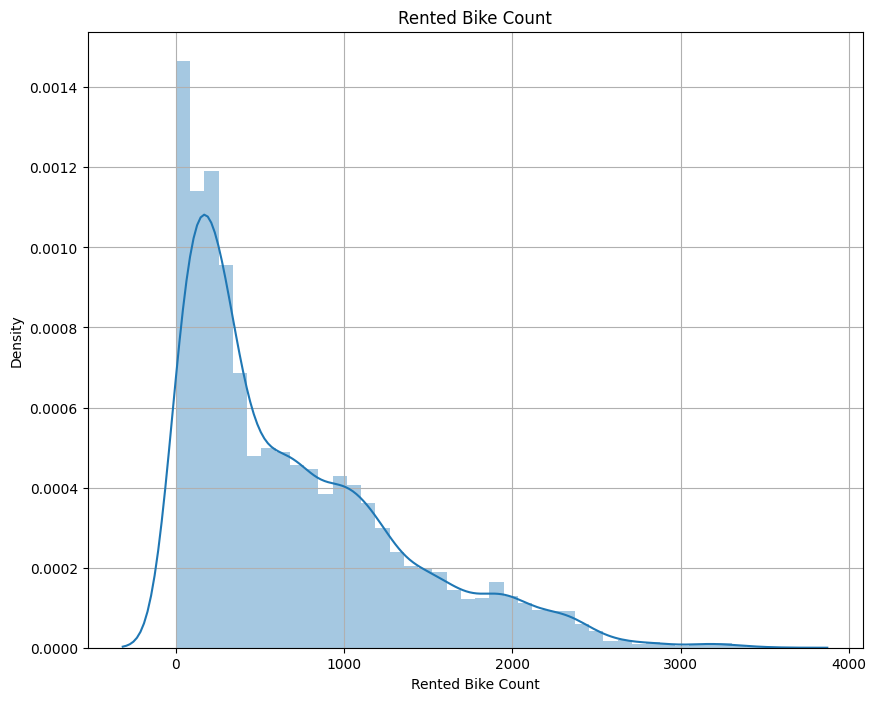

In [186]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.distplot(bike_data['Rented Bike Count'])
plt.title('Rented Bike Count')
plt.grid(True)
plt.show()

# px.histogram(bike_data,x='Rented Bike Count',nbins=50, text_auto=True)

##### 1. Why did you pick the specific chart?

- Displot is a good to choice to plot the data distribution

##### 2. What is/are the insight(s) found from the chart?

- The data is positively skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Here we can see that the data is positively skewed so it means the bike demand for smaller bulks is more

#### Chart - 2
- Data distribution of categorical data wrt to Rented Bike Count

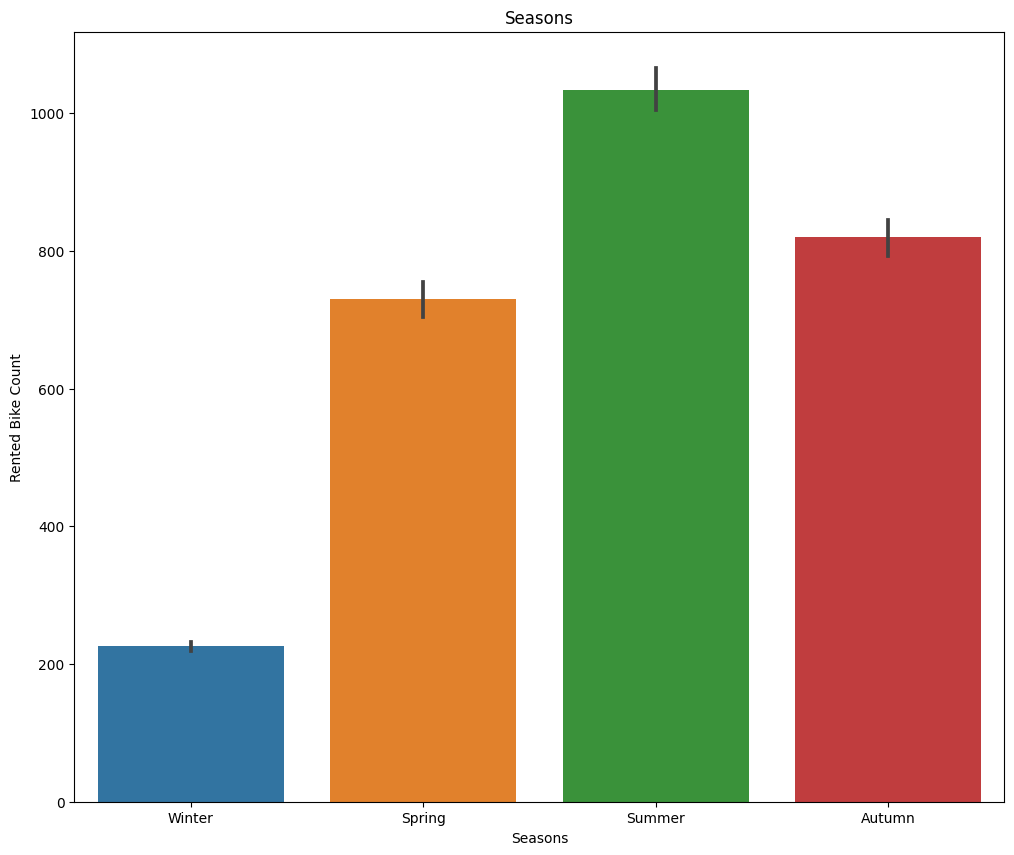

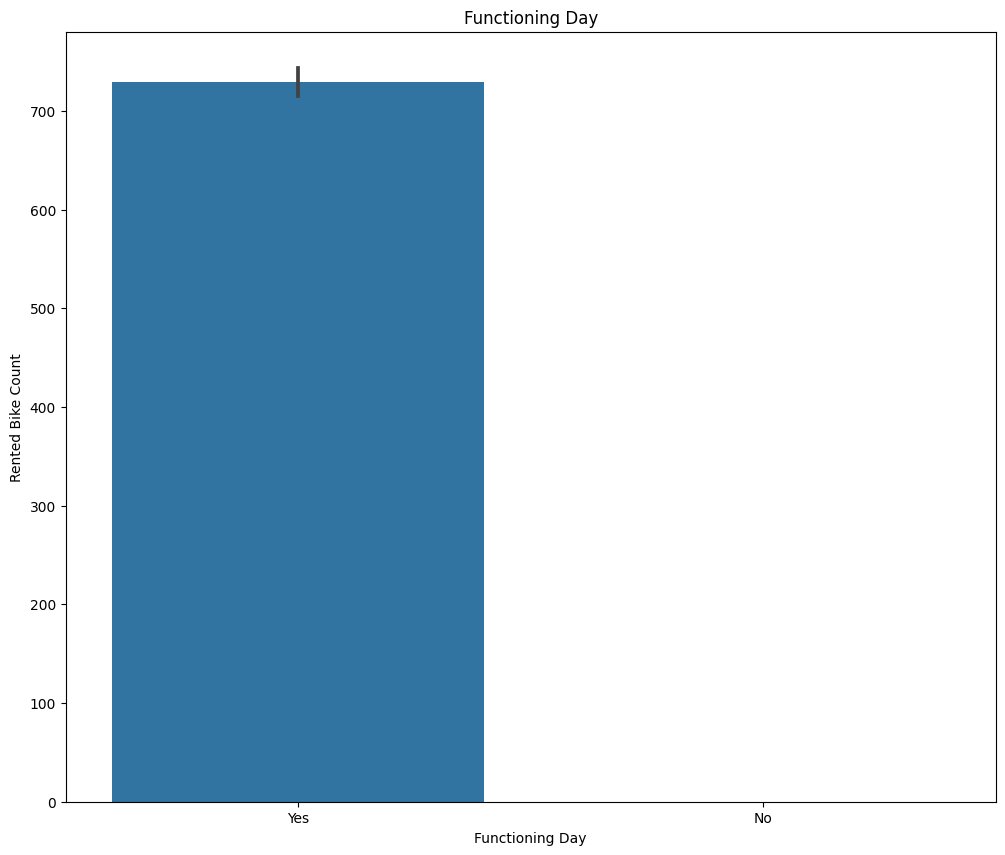

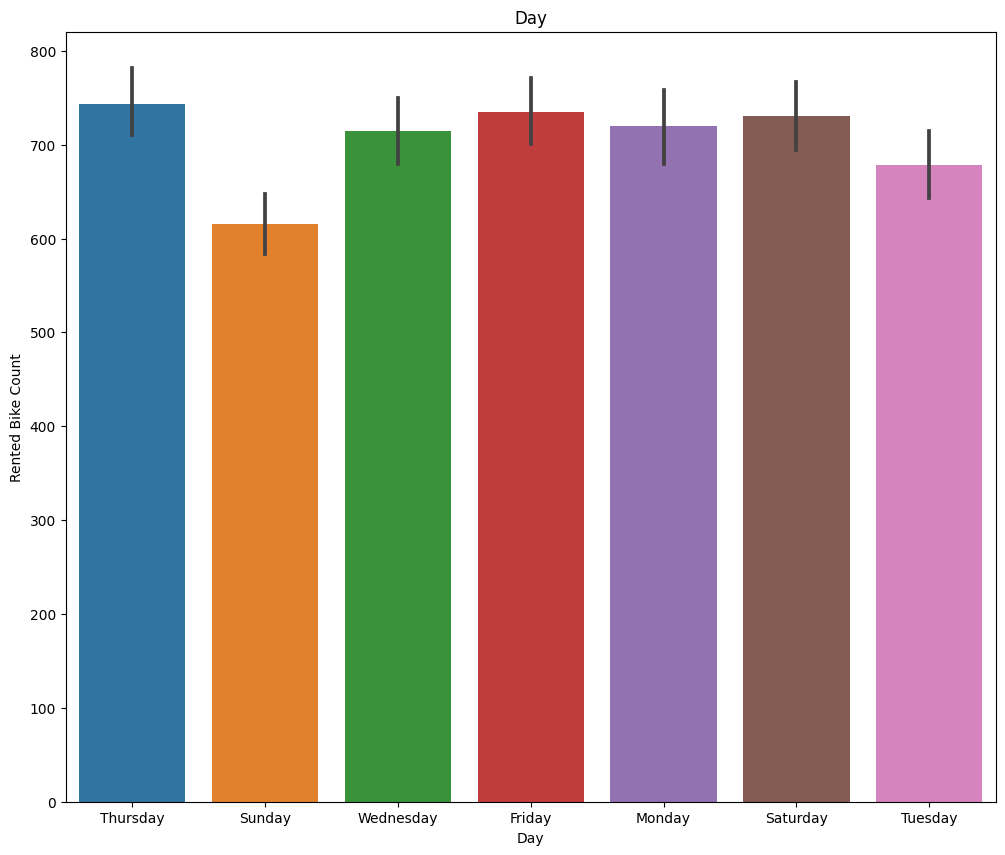

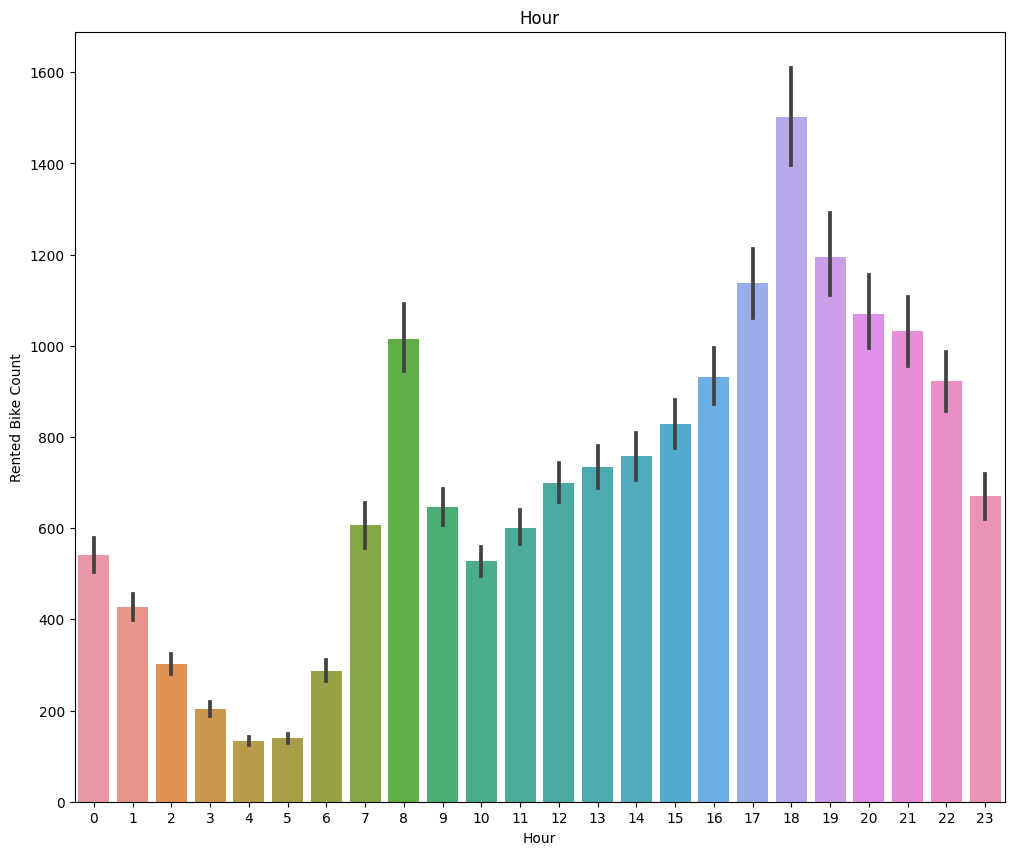

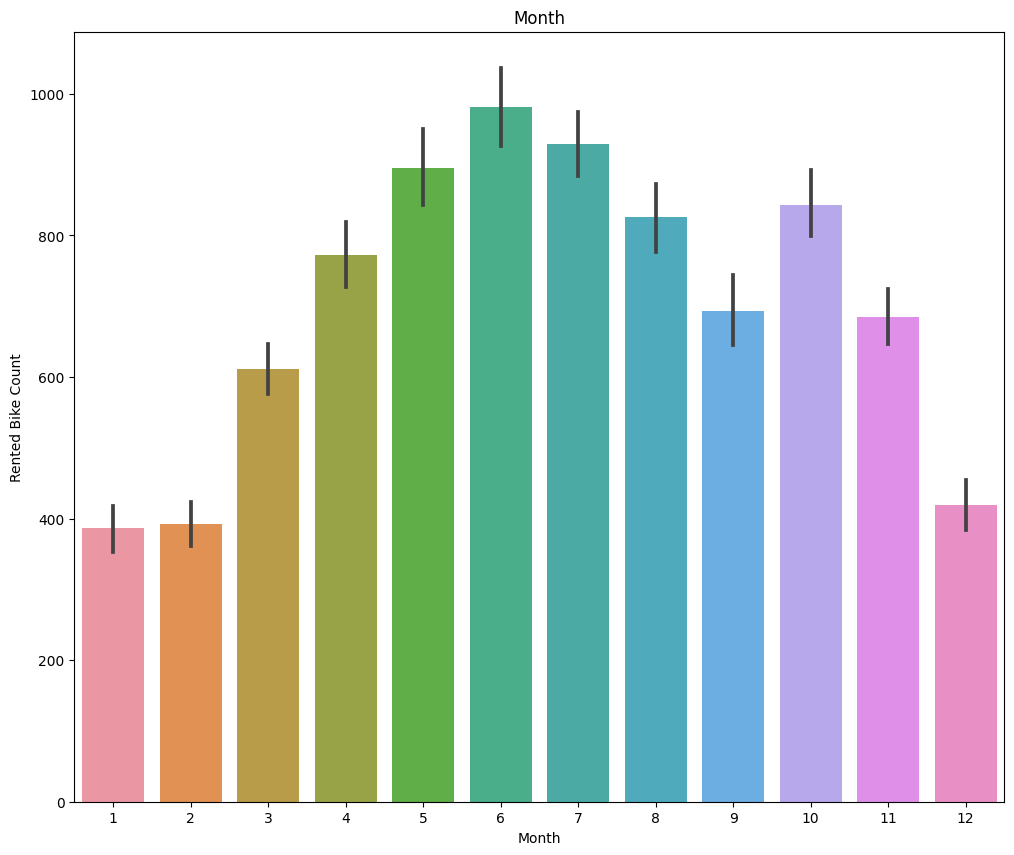

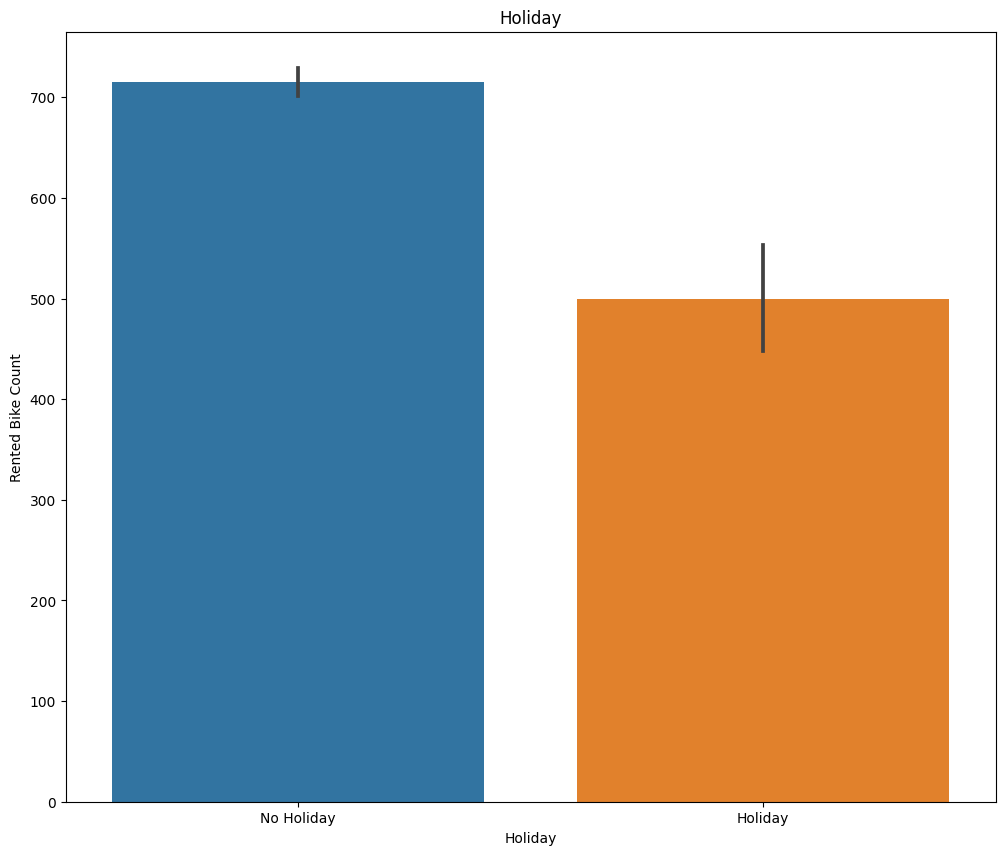

In [259]:
# Chart - 2 visualization code
for col_name in categorical_cols:
  plt.figure(figsize=(12,10))
  sns.barplot(x=bike_data[col_name],y=bike_data['Rented Bike Count'])
  plt.title(col_name)
  plt.show()

# for col_name in categorical_cols:
#     fig = px.bar(bike_data, x=col_name, y=bike_data['Rented Bike Count'], title=col_name,color=col_name, labels={col_name: col_name})
#     fig.show()

##### 1. Why did you pick the specific chart?

- To visualize the data spread of the categorical features.

##### 2. What is/are the insight(s) found from the chart?

- Peak Hours : 5pm - 8pm
- Peak Months: June(Highest) & January(Lowest)
- Weekdays count : Thursday(Highest)
- Preferred season : Summer(Most) & Winter(Least)


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The above insights can definitely have to create a positive business impact as we got many information.

#### Chart - 3
- Chart of Bike Rent Count throughout the year

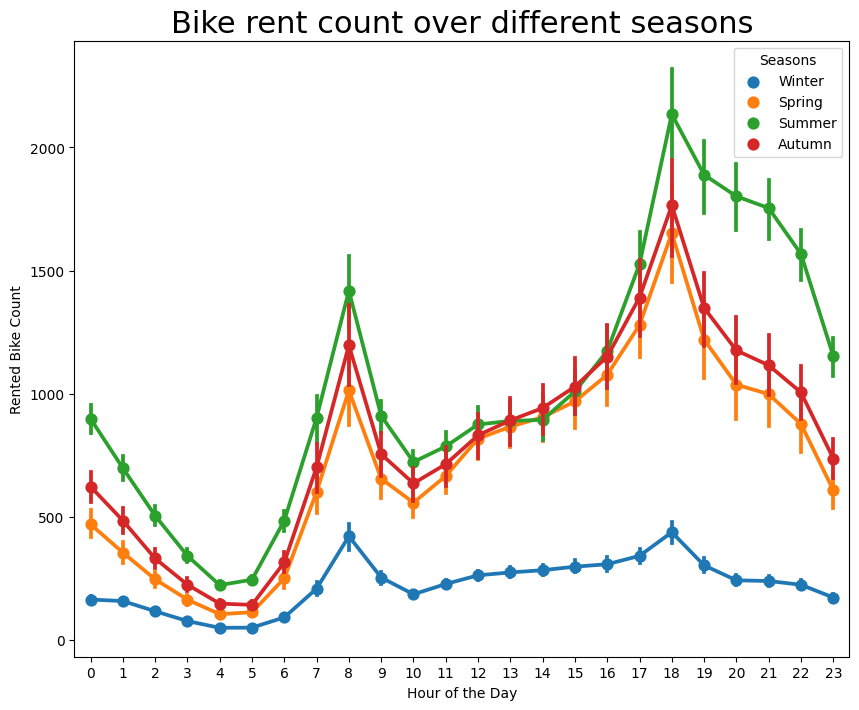

In [294]:
plt.figure(figsize=(10,8))
sns.pointplot(x=bike_data['Hour'],y=bike_data['Rented Bike Count'],hue=bike_data['Seasons'])
plt.title('Bike rent count over different seasons',fontsize=22)
plt.xlabel('Hour of the Day')
plt.show()

##### 1. Why did you pick the specific chart?

- Point plot is a good choice for plotting time series data.

##### 2. What is/are the insight(s) found from the chart?

- Out of the four seasons Summer has the highest bike rent count and Winter has the least.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Bike rental companies can maximize their profits during the Summer and Autumn.

#### Chart - 4
- Checking for Outliers in the numerical column

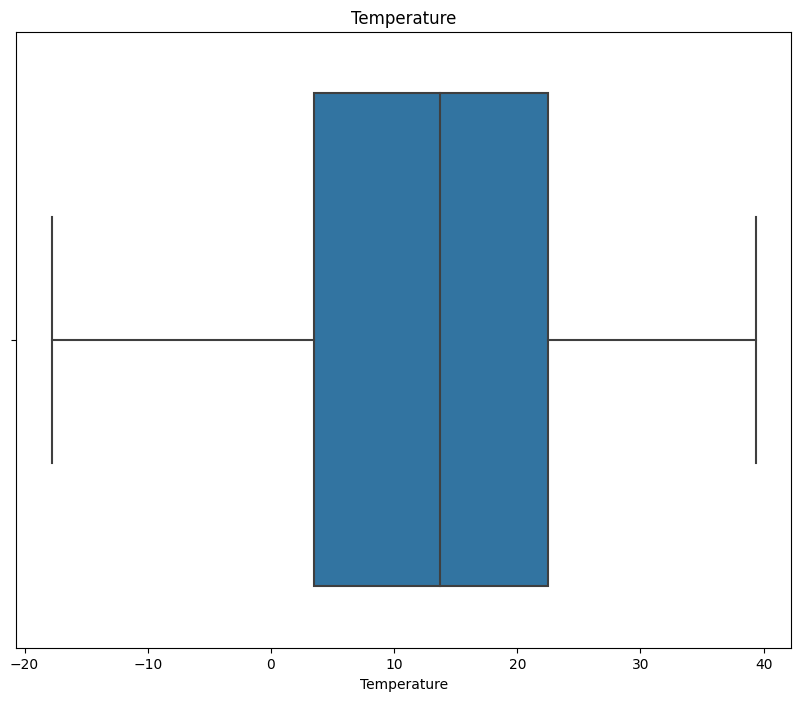

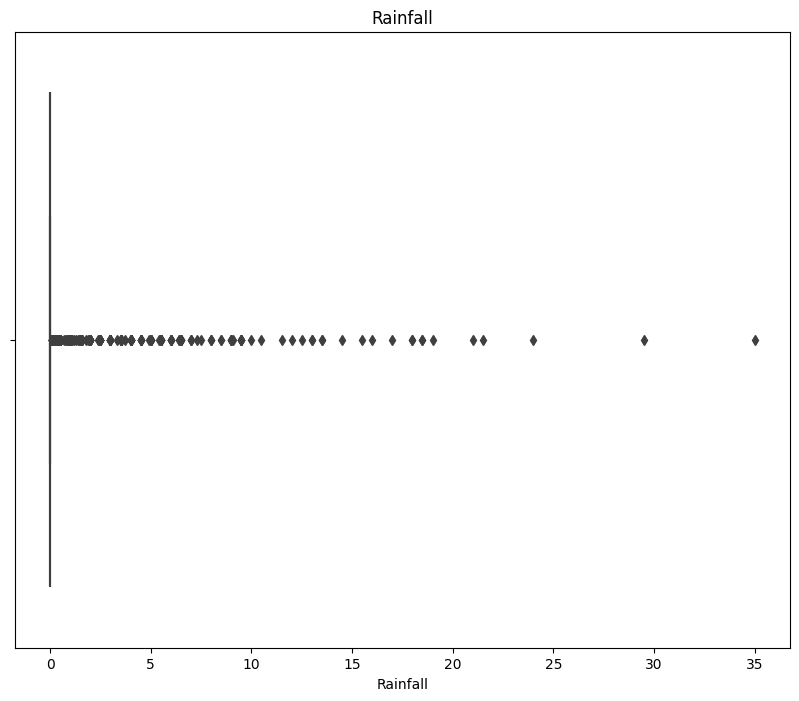

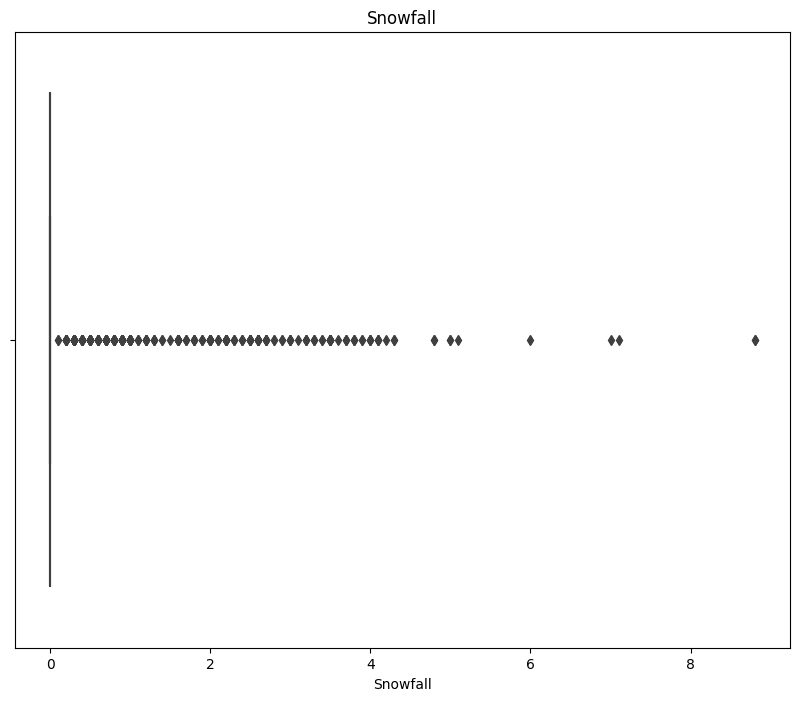

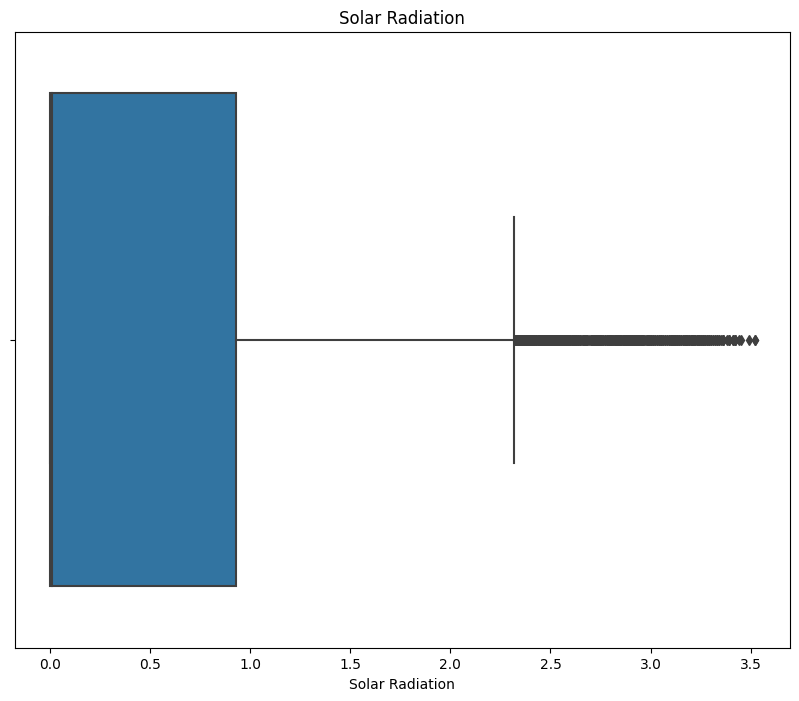

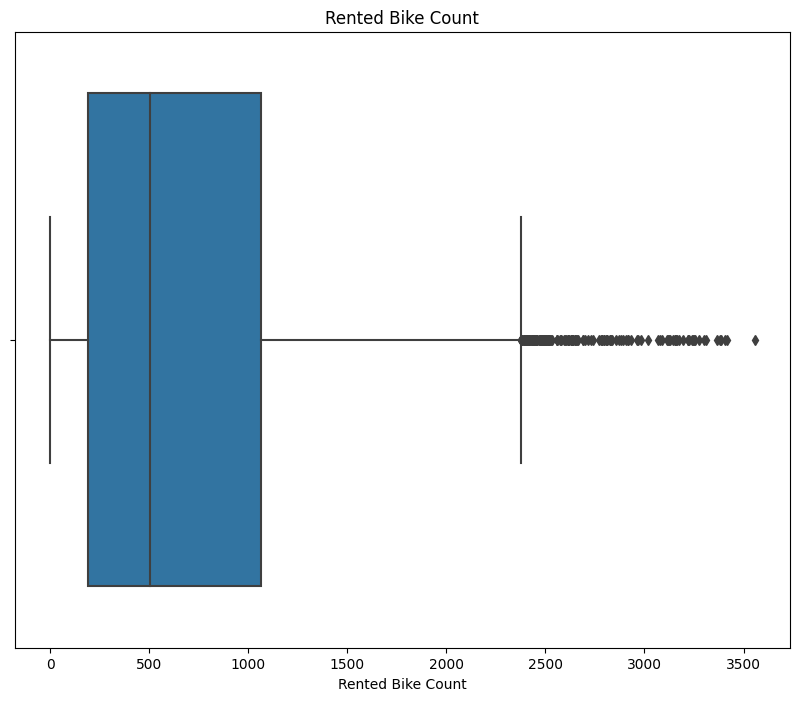

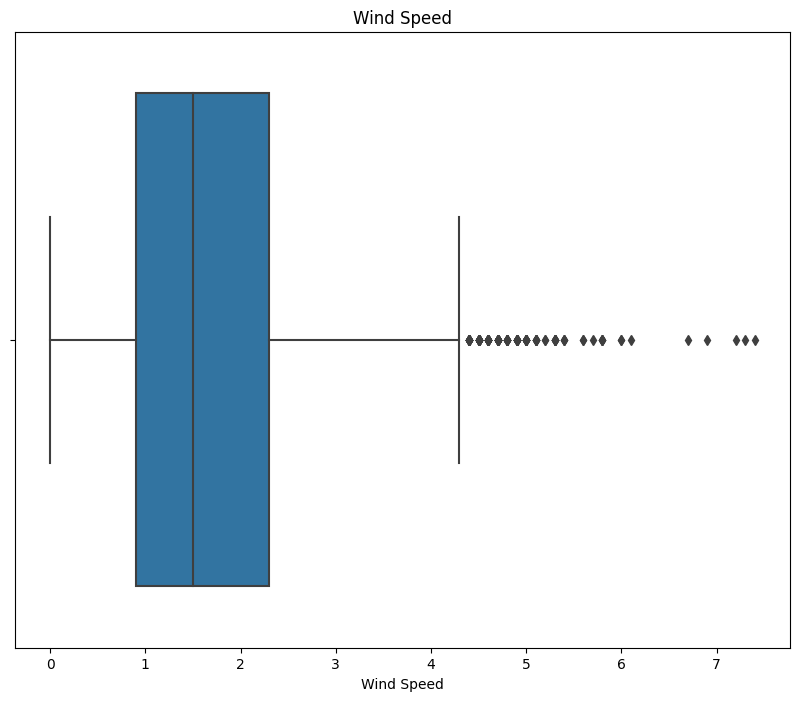

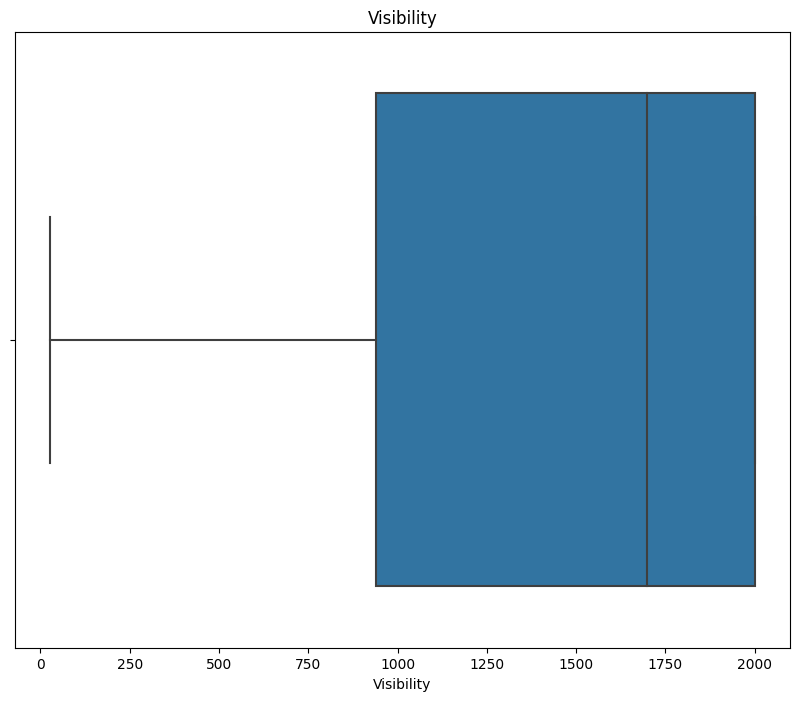

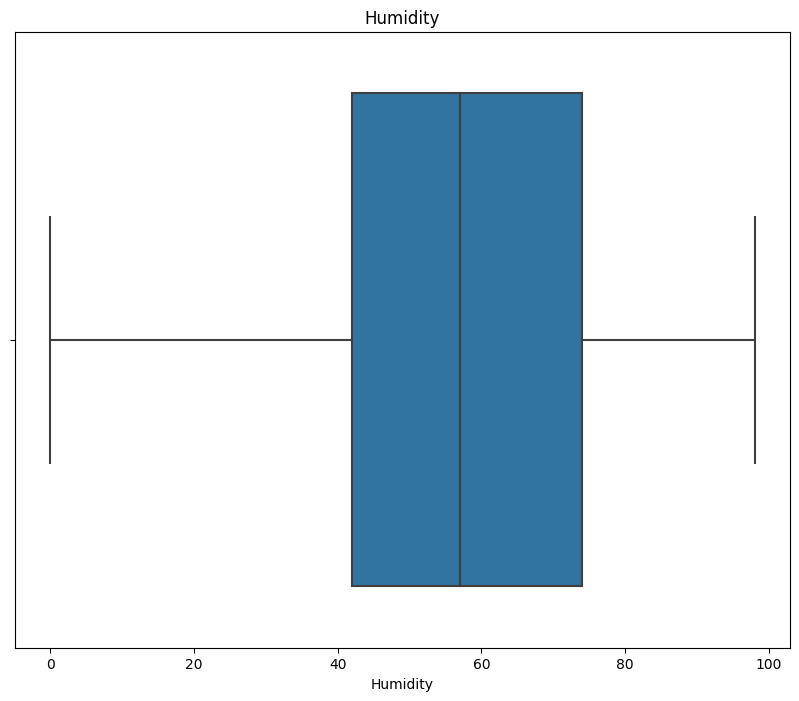

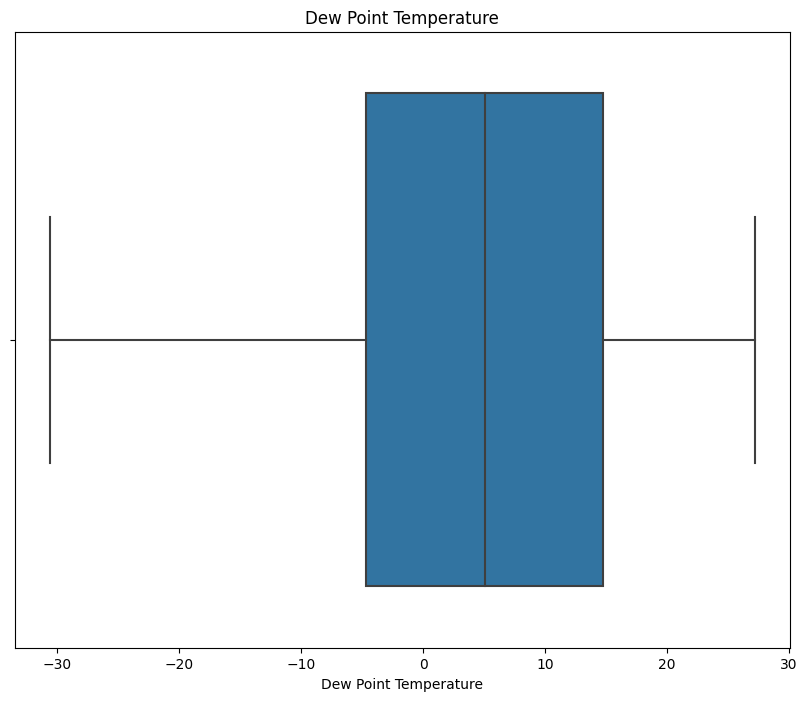

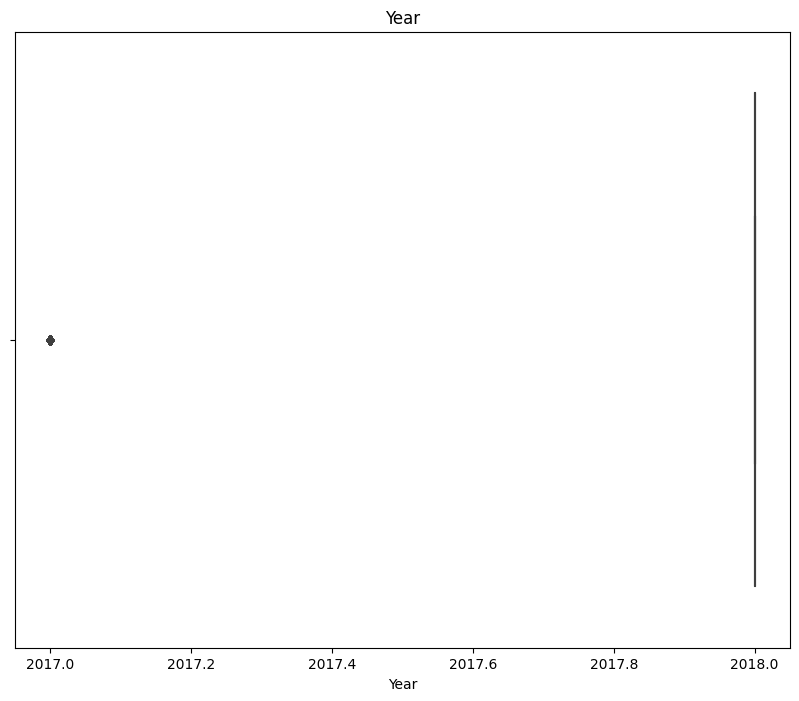

In [190]:
# Chart - 4 visualization code
for val in numerical_cols:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bike_data[val])
  plt.title(val)
  plt.show()

##### 1. Why did you pick the specific chart?

- Boxplots can be used to visualize outliers present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Columns with outliers:
- Rainfall
- Solar Radiation
- Snowfall
- Windspeed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In some cases presence of outliers can be an opporunity for business growth.

#### Chart - 5
- Bike Rent Count with specific hours of the Day

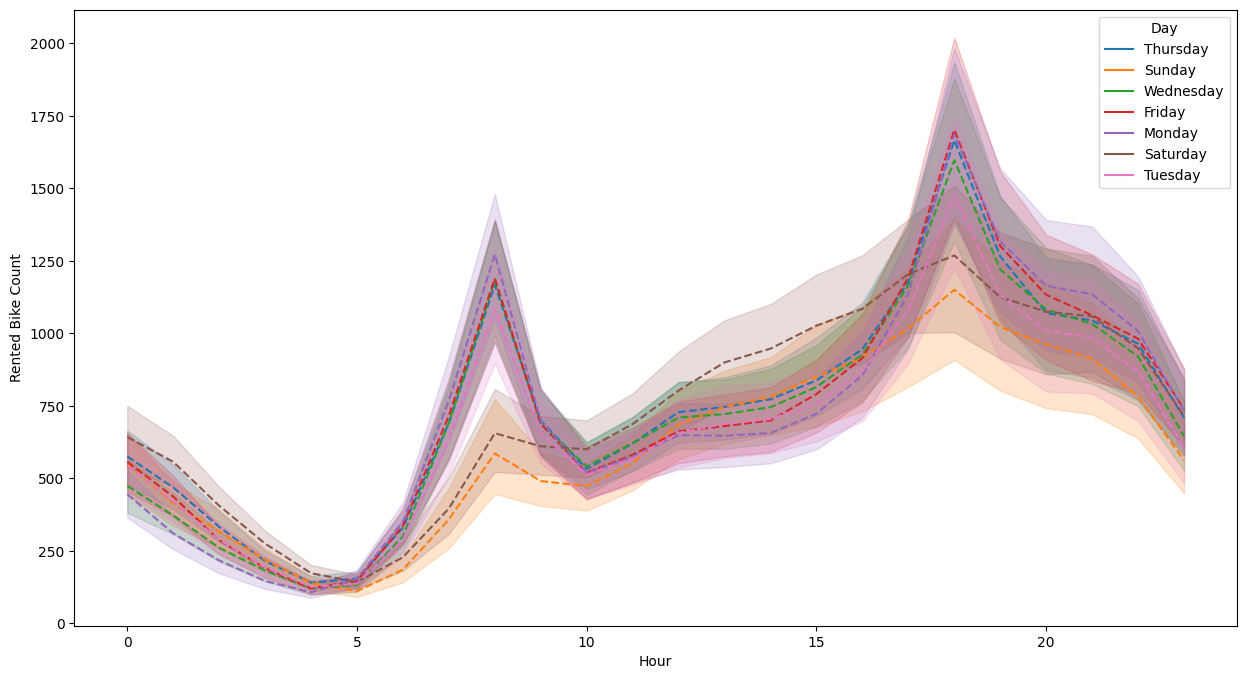

In [293]:
# Chart - 5 visualization code
plt.figure(figsize=(15,8))
sns.lineplot(x=bike_data['Hour'],y= bike_data['Rented Bike Count'],hue=bike_data['Day'],linestyle='dashed')
plt.show()


##### 1. Why did you pick the specific chart?

- To perform a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

- Highest number of bikes are rented on Friday and Thursday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can see on which days more bikes are rented so based on the day companies can stock up and maximize the profits.

#### Chart - 6
- Bike Rent Count on Holidays

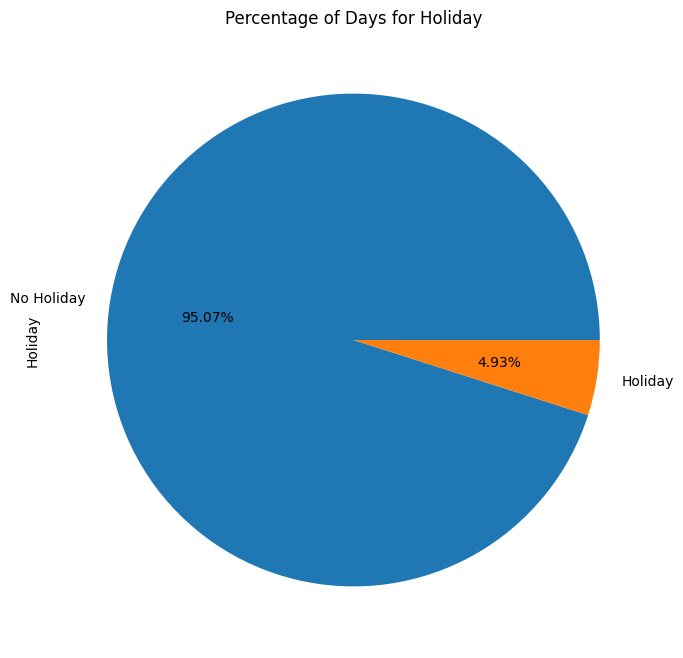

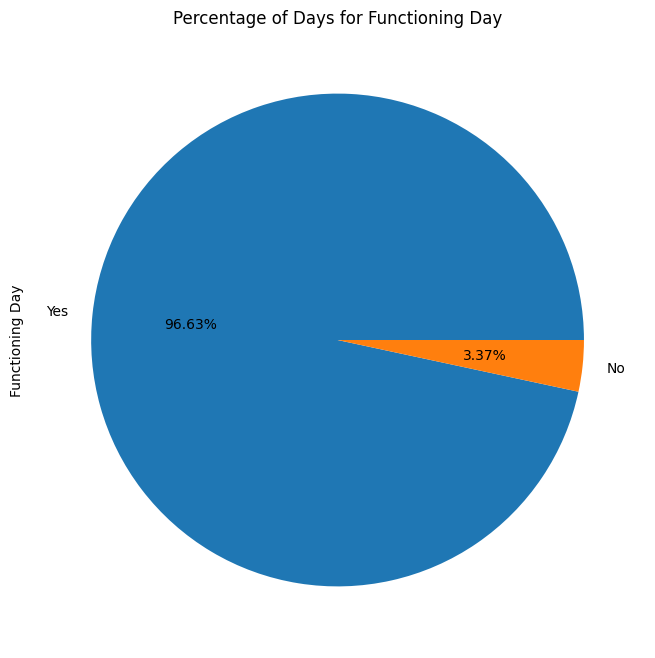

In [285]:
# Chart - 6 visualization code
cols = ['Holiday','Functioning Day']

for col in cols:
  days_percent = bike_data[col].value_counts()
  plt.figure(figsize=(8,8))

  days_percent.plot(kind='pie',autopct="%.2f%%")
  plt.title(f"Percentage of Days for {col}")
  plt.show()

##### 1. Why did you pick the specific chart?

- Pie charts are easy to interpret and understand the logic and share of values better in percentage.

##### 2. What is/are the insight(s) found from the chart?

- Its is observed that 95.07% of days are working(non-holiday) and 4.93% of days are holidays in the data given.

- And 96.63% of values are recorded as functioning day where are the remaining are non functioning day

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Majority of the days when the data was recorded are either Non-Holiday or Functional days.

#### Chart - 7
- Regression plot of the numerical columns

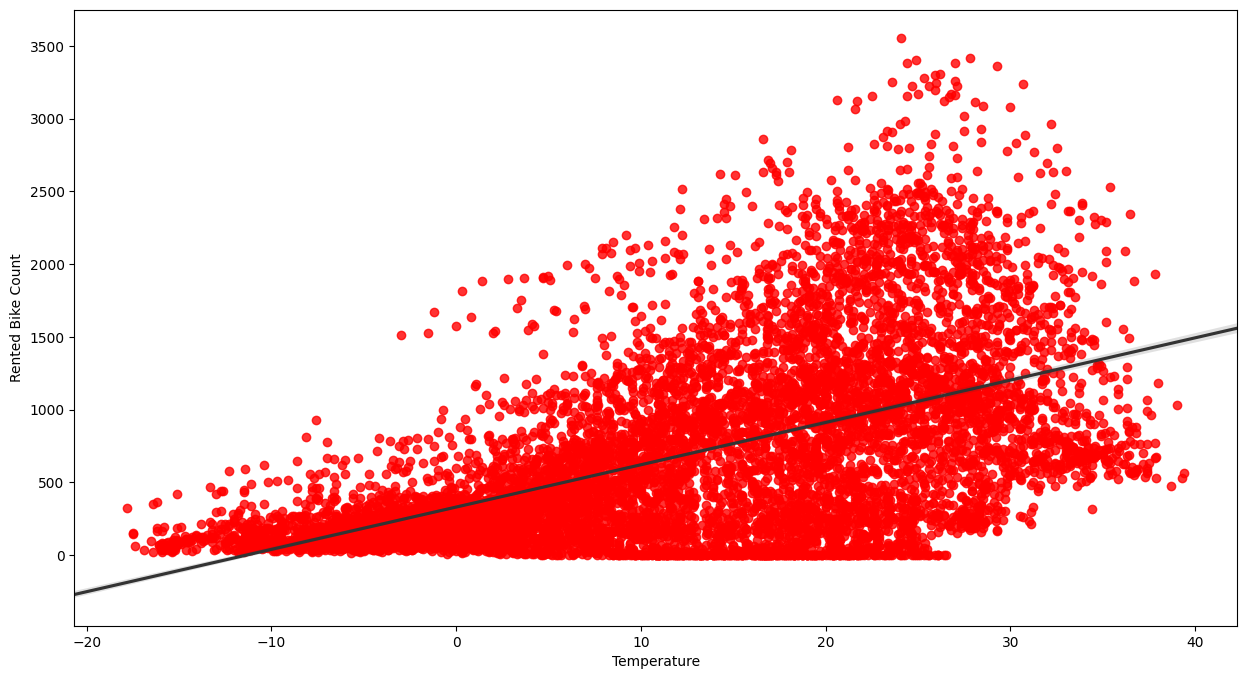

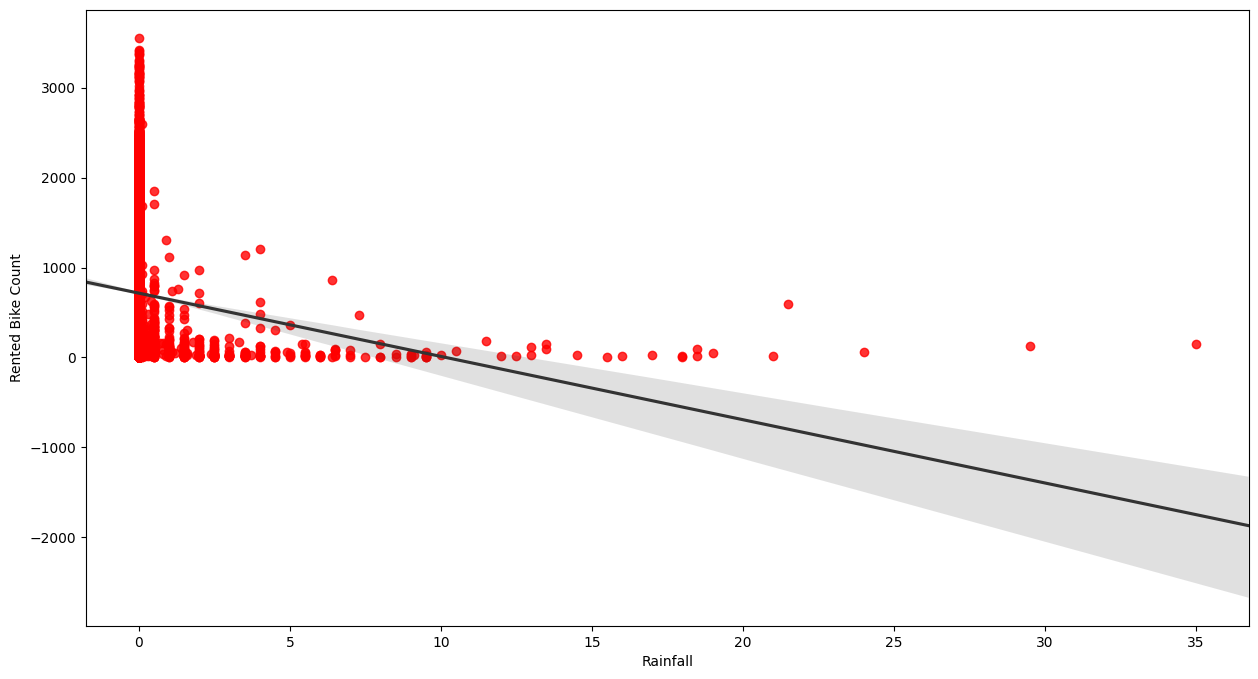

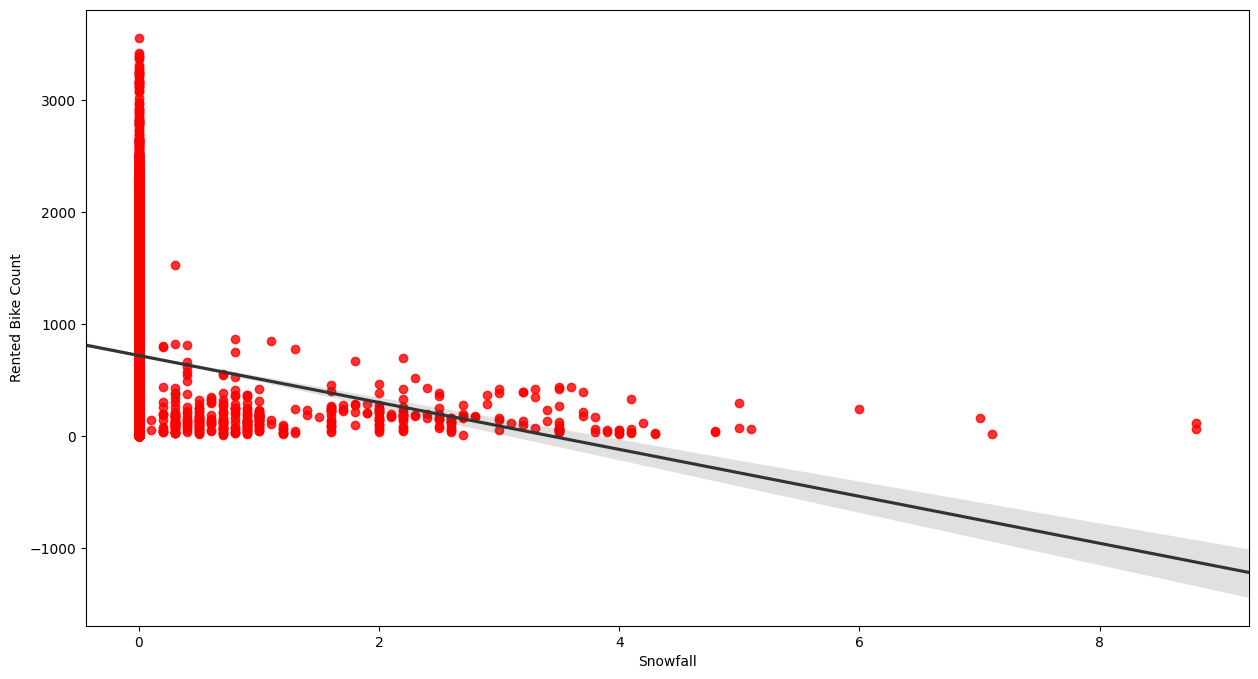

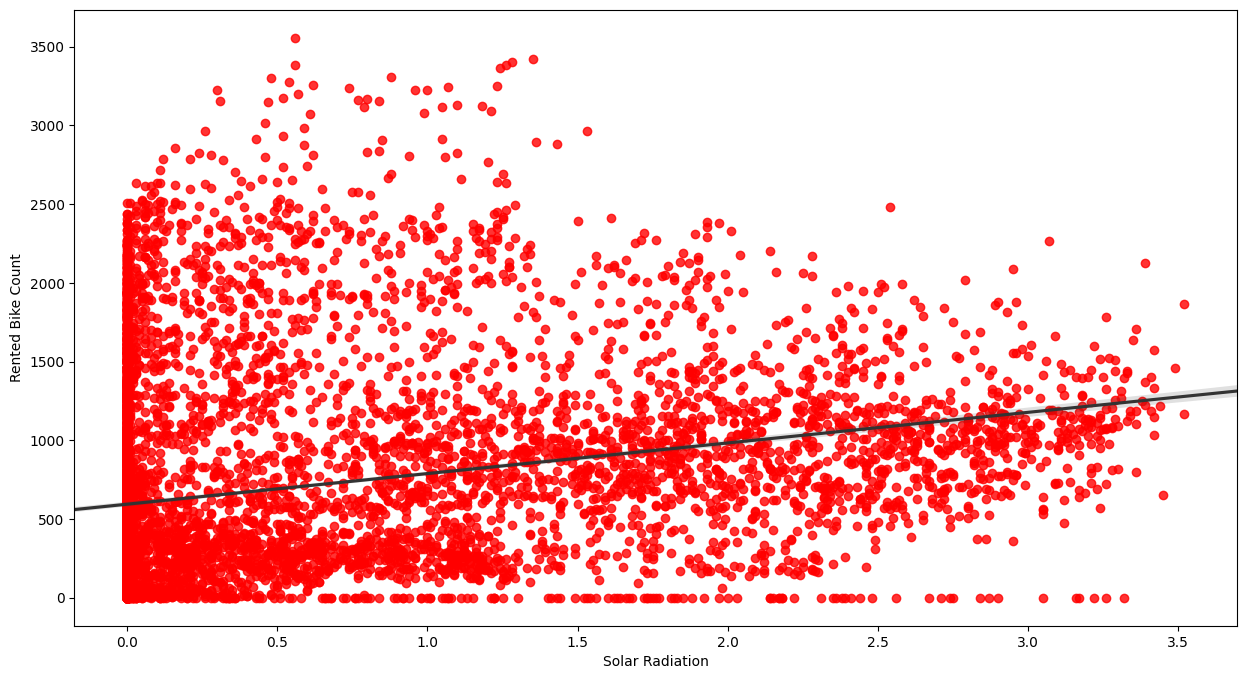

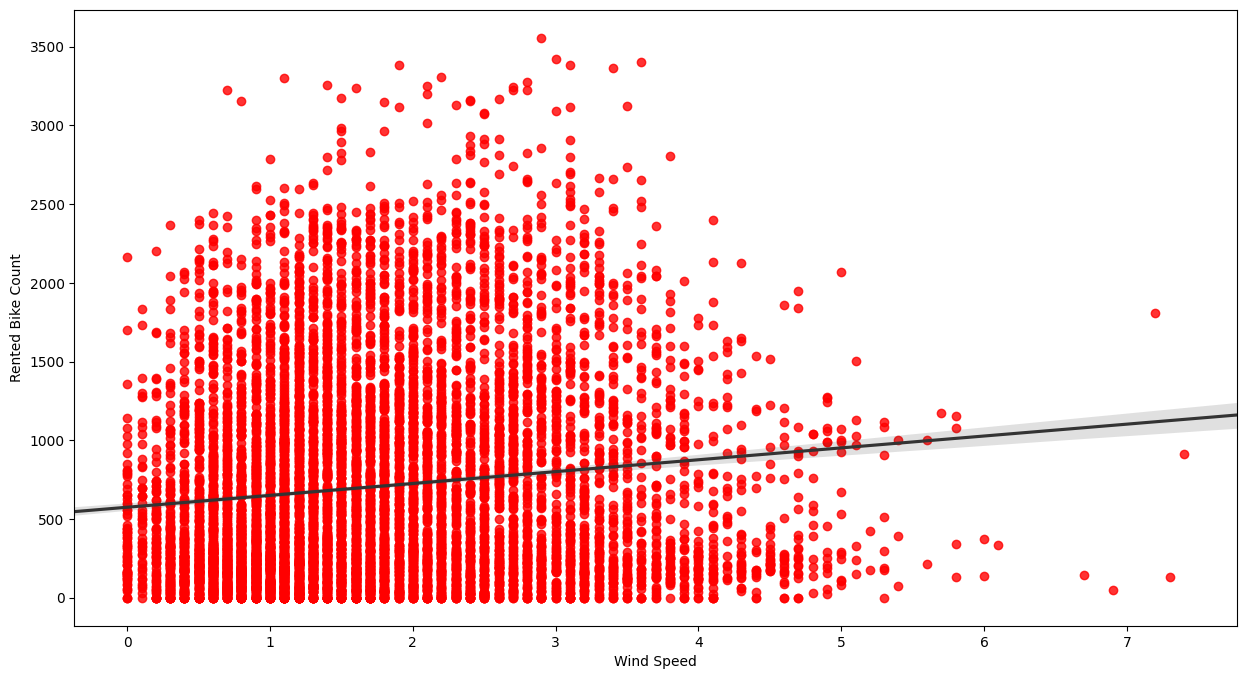

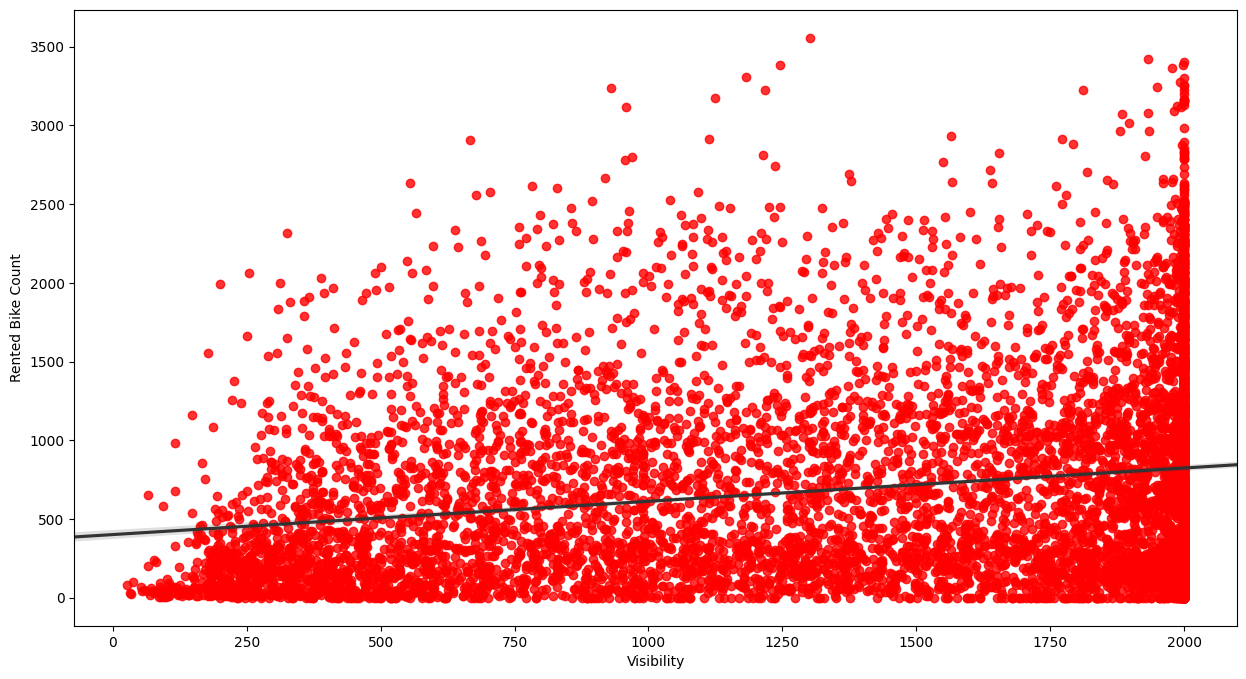

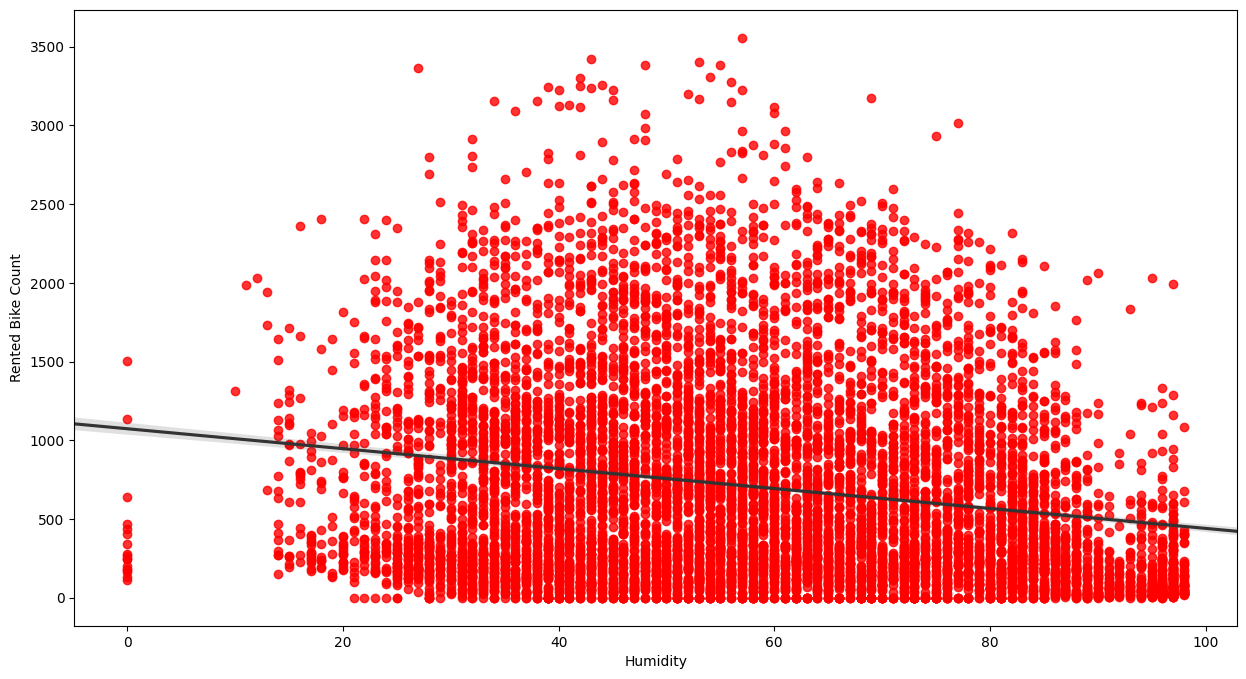

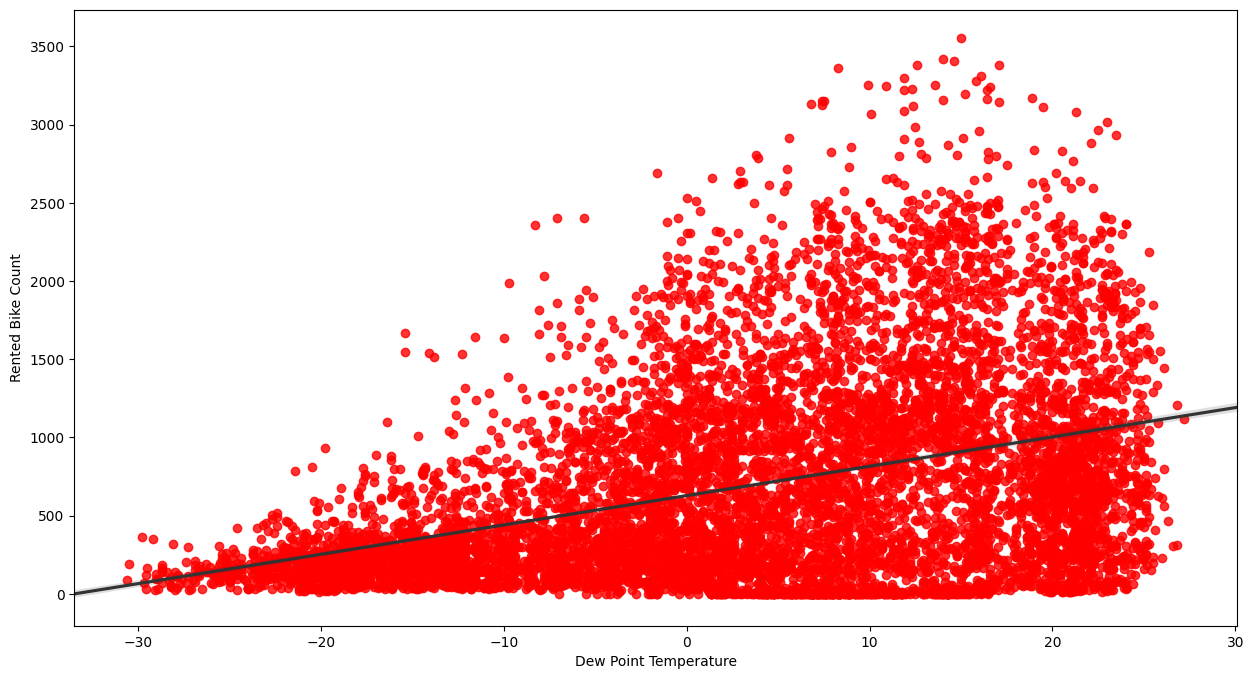

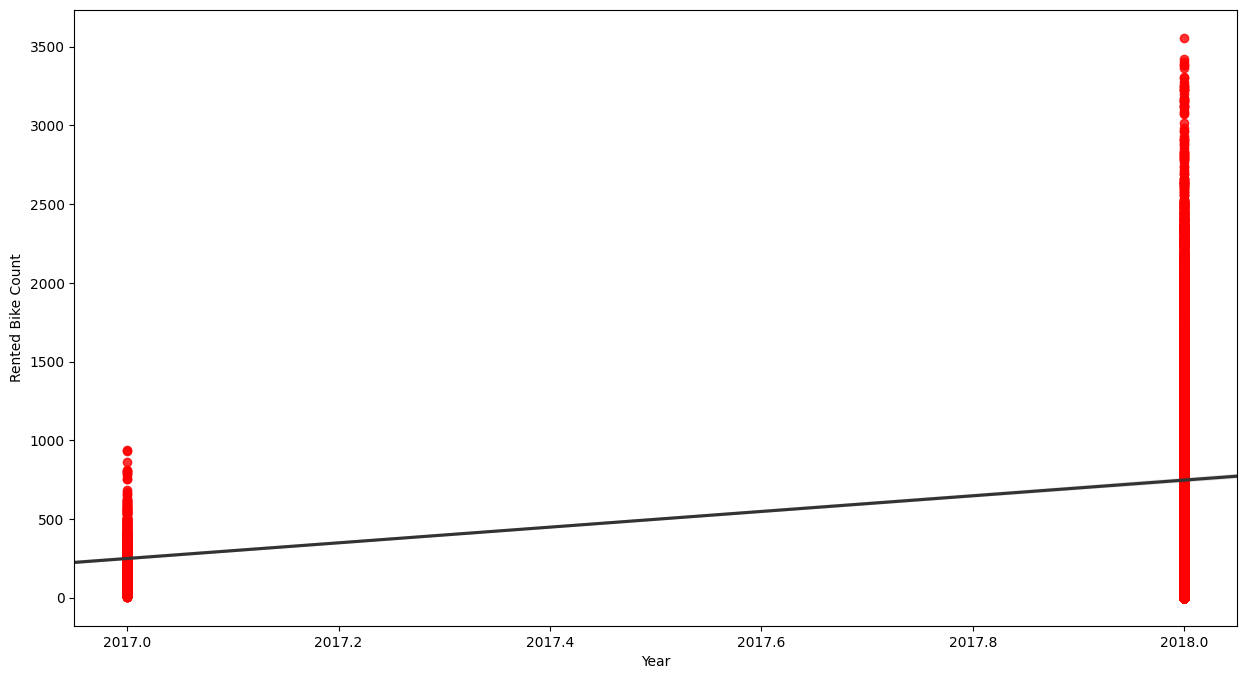

In [254]:
# Chart - 7 visualization code
for val in numerical_cols:
  if val not in ['Rented Bike Count']:
    fig = plt.figure(figsize=(15,8))
    fig = plt.gca()

    sns.regplot(data=bike_data, x=val, y='Rented Bike Count',truncate=False,color='.2',scatter_kws={'color':'red'})
    plt.show()

##### 1. Why did you pick the specific chart?

- A linear regression plot shows the average increase in Y as X increases.

##### 2. What is/are the insight(s) found from the chart?

Weather factor relationship with demand for rental bikes:
- Temperature	: Positive (increases demand)
- Humidity : Negative (decreases demand)
- Wind speed	: Positive (increases demand) up to 3 kilometers per hour
- Visibility	: No clear relationship
- Dew point temperature	: Positive (increases demand)
- Solar radiation	: Positive (increases demand)
- Snowfall and rainfall	: Negative (decreases demand)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- By understanding the average demand for rental bikes under different environmental conditions, businesses can better meet the needs of their customers and maximize profits.

#### Chart - 8
- Bike rent demand on hourly basis

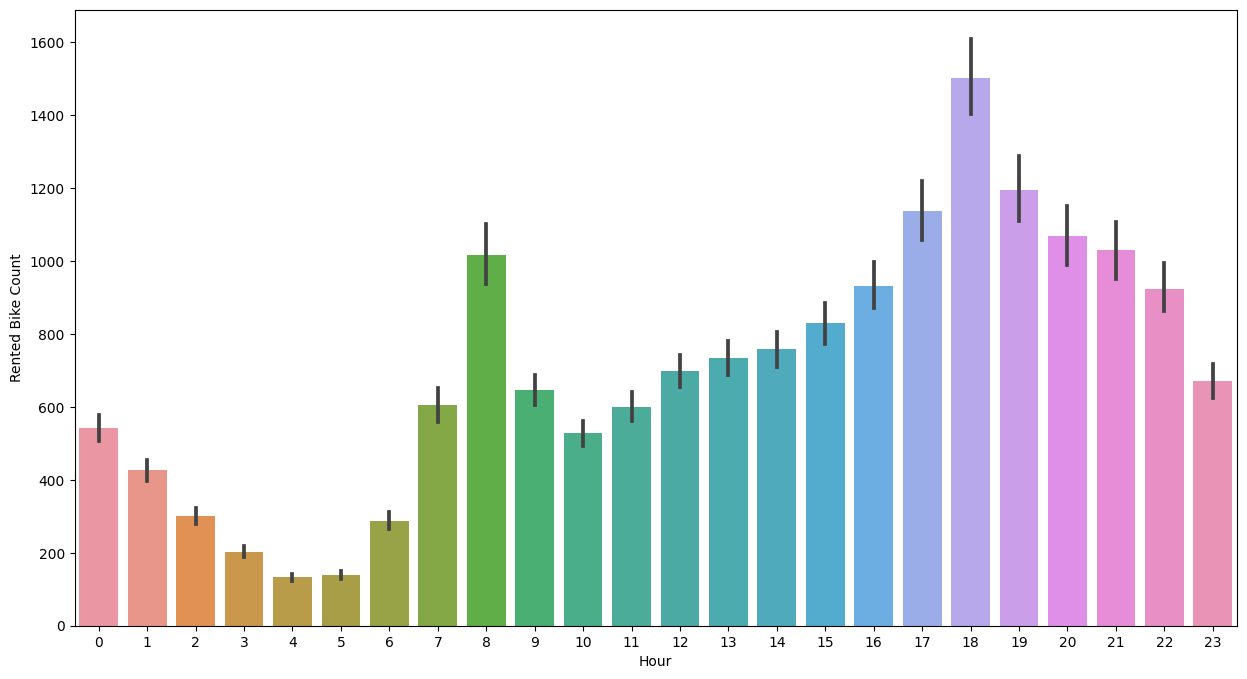

In [256]:
# Chart - 8 visualization code
plt.figure(figsize=(15,8))
Hour=bike_data.groupby('Hour').sum().reset_index()
sns.barplot(x='Hour',y='Rented Bike Count', data=bike_data)
plt.show()

##### 1. Why did you pick the specific chart?

- Bar charts are a helpful way to communicate data to others, as they are easy to understand and interpret.

##### 2. What is/are the insight(s) found from the chart?

- Peak hours are between 5 to 8 pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Companies can try to keep the highest numbers of bike available during the peak hours and try to maximize the profit.

#### Chart - 9
- Plotting chart of the dependent variable before applying normalization

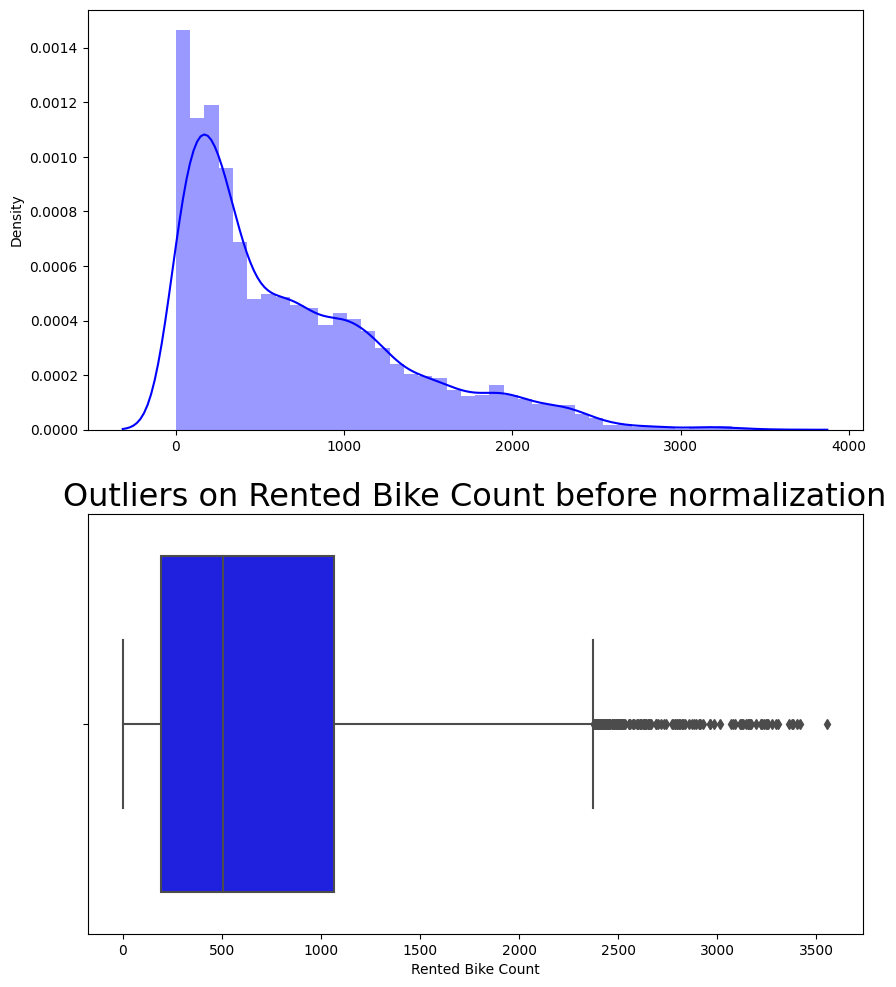

In [287]:
# Chart - 9 visualization code

#Plotting the distplot and boxplot
fig,ax = plt.subplots(2,1,figsize=(10,12))
sns.distplot(x=bike_data['Rented Bike Count'],color='b',ax=ax[0])
sns.boxplot(x=bike_data['Rented Bike Count'],color='b',ax=ax[1])
plt.title("Outliers on Rented Bike Count before normalization",fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- Boxplot can be used to visualize the outliers present in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- Dependent variable column is highly skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Without normalization this could affect the model accuracy and performance.

#### Chart - 10
- Plotting chart of the dependent variable after applying normalization

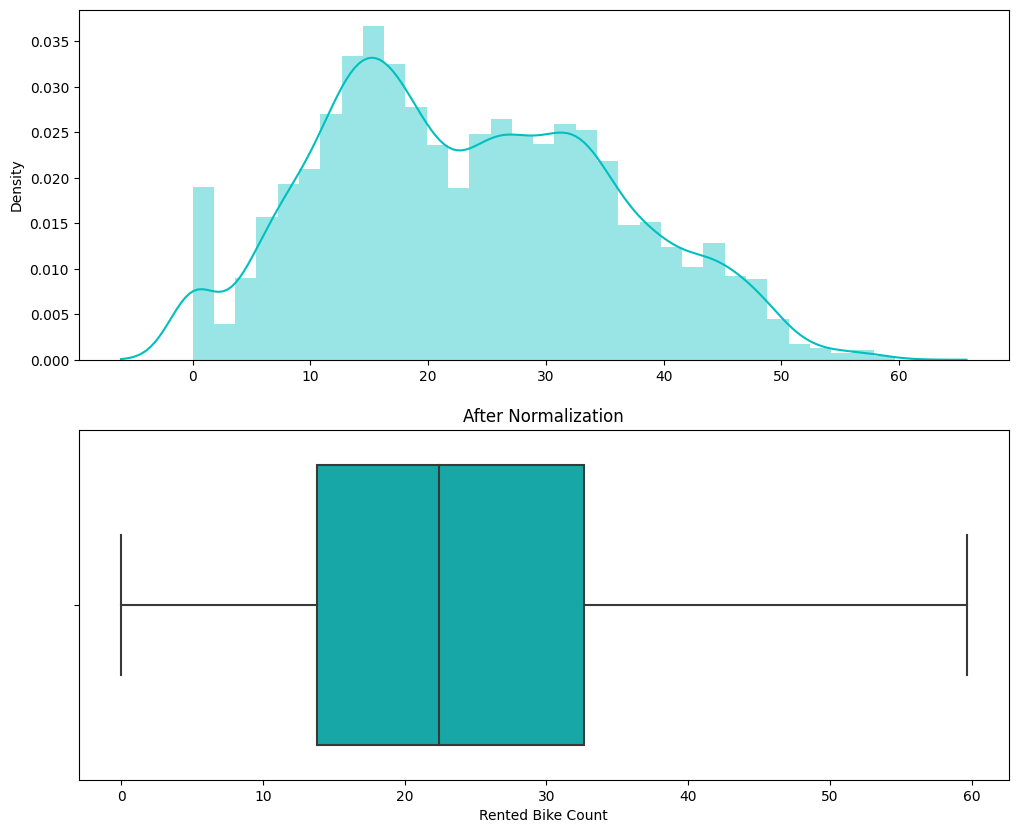

In [269]:
# Chart - 10 visualization code

#Data normalization using the square root method
fig,ax = plt.subplots(2,1,figsize=(12,10))
sns.distplot(x=np.sqrt(bike_data['Rented Bike Count']),color='c',ax=ax[0])
sns.boxplot(x=np.sqrt(bike_data['Rented Bike Count']),color='c',ax=ax[1])
plt.show()

##### 1. Why did you pick the specific chart?

- Distpot hepls in visualizing the data distribution.

##### 2. What is/are the insight(s) found from the chart?

- After normalization, dependent variable isn't skewed as the outliers have been removed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Normalization is a useful technique that can improve the accuracy and performance of machine learning models.

#### Chart - 11
- Plotting charts of the numerical columns

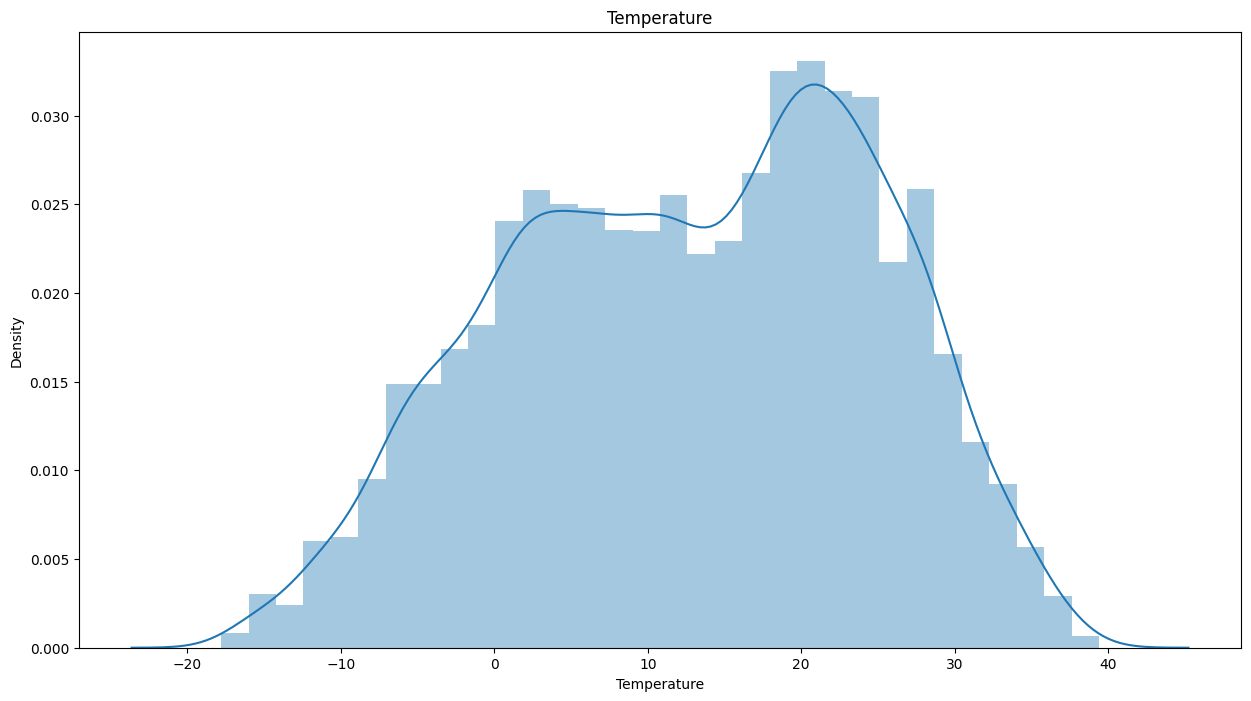

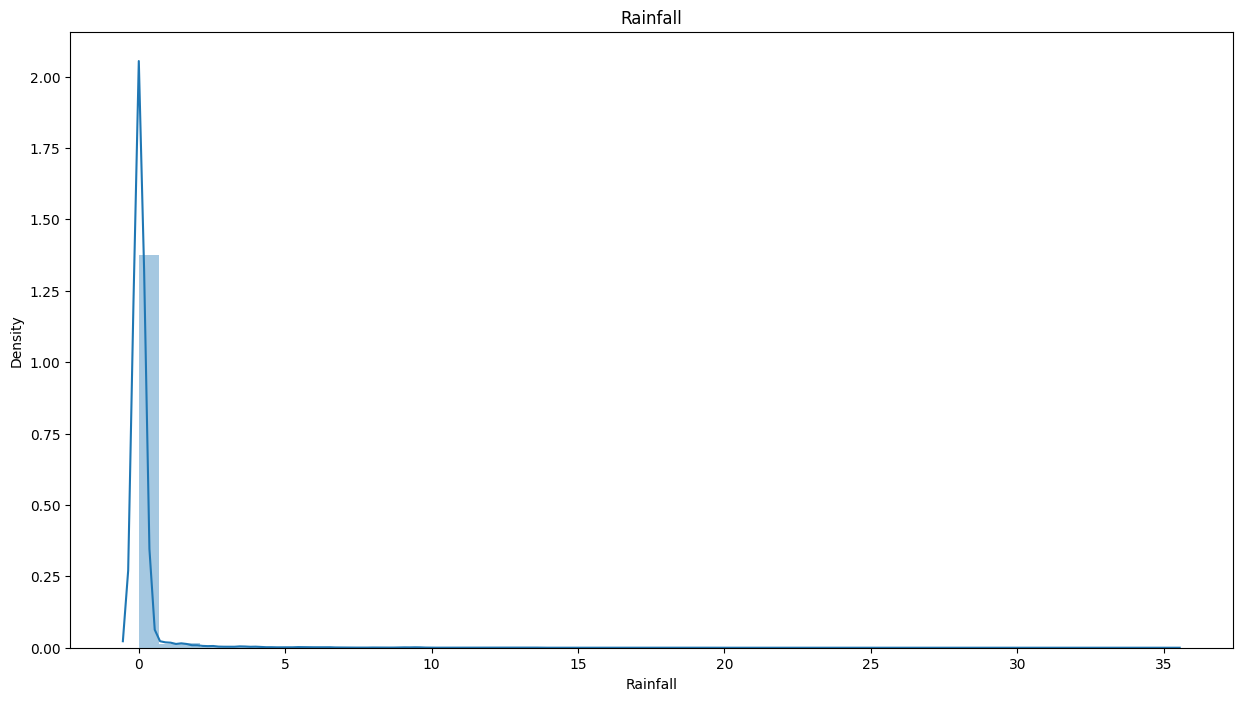

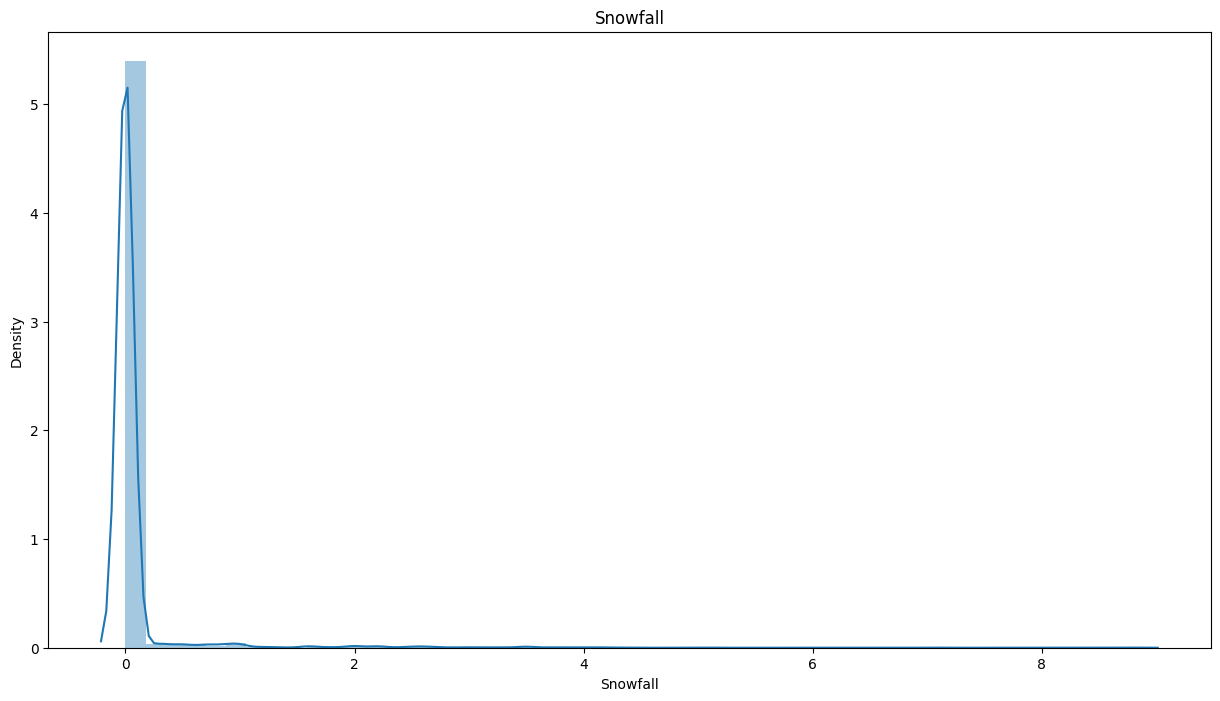

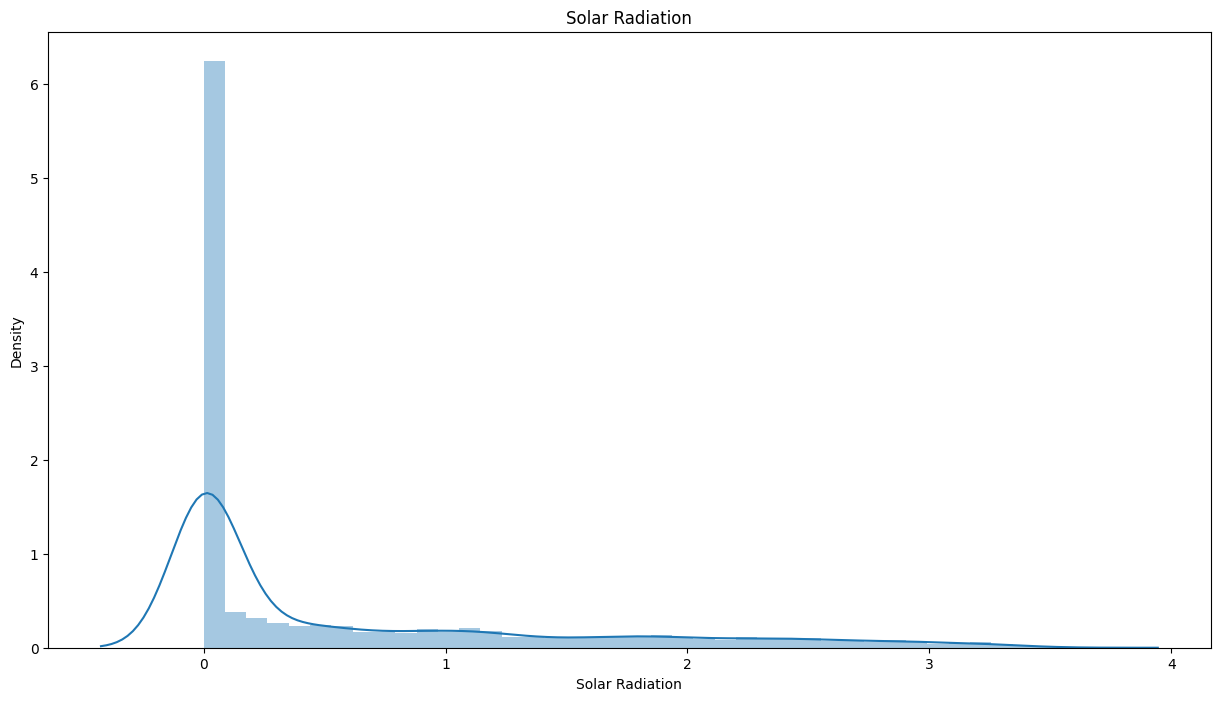

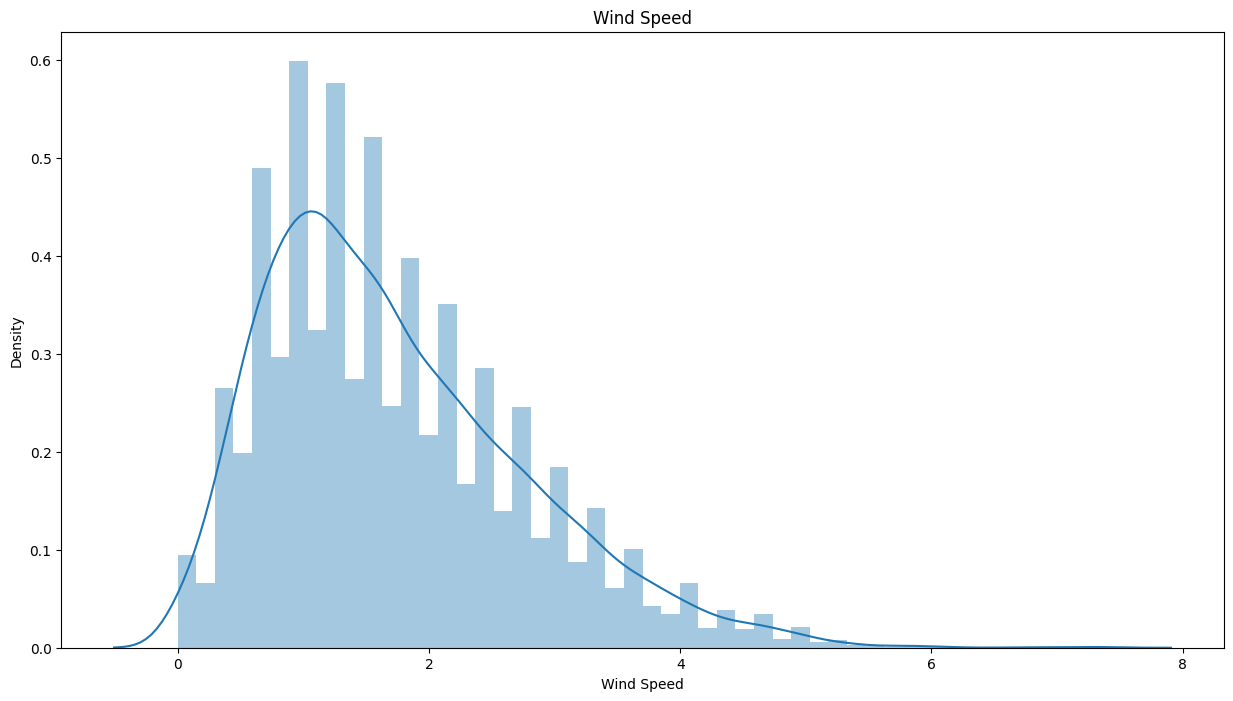

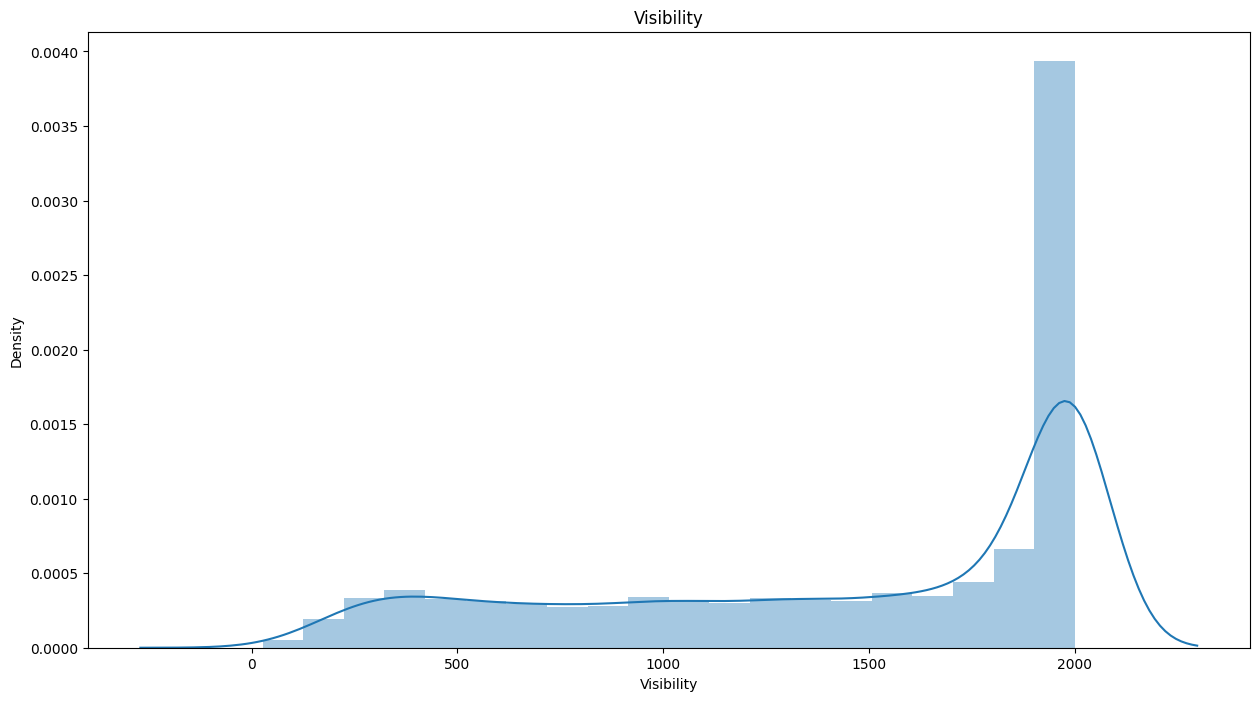

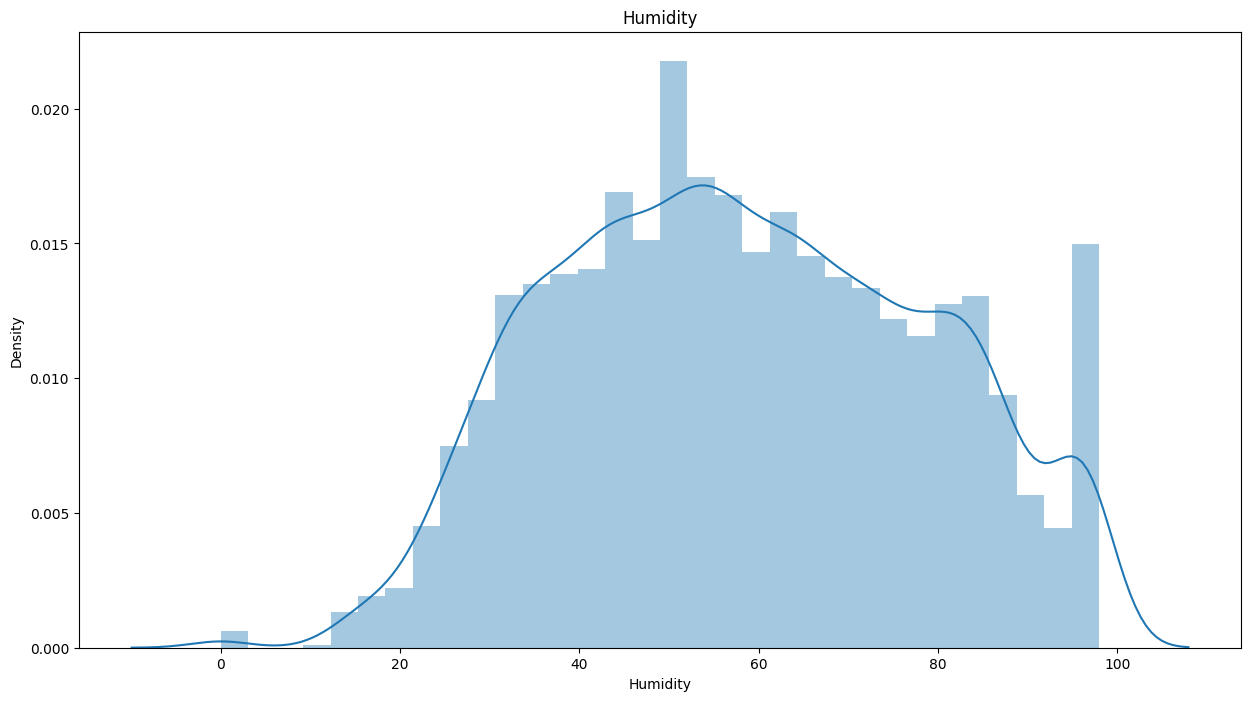

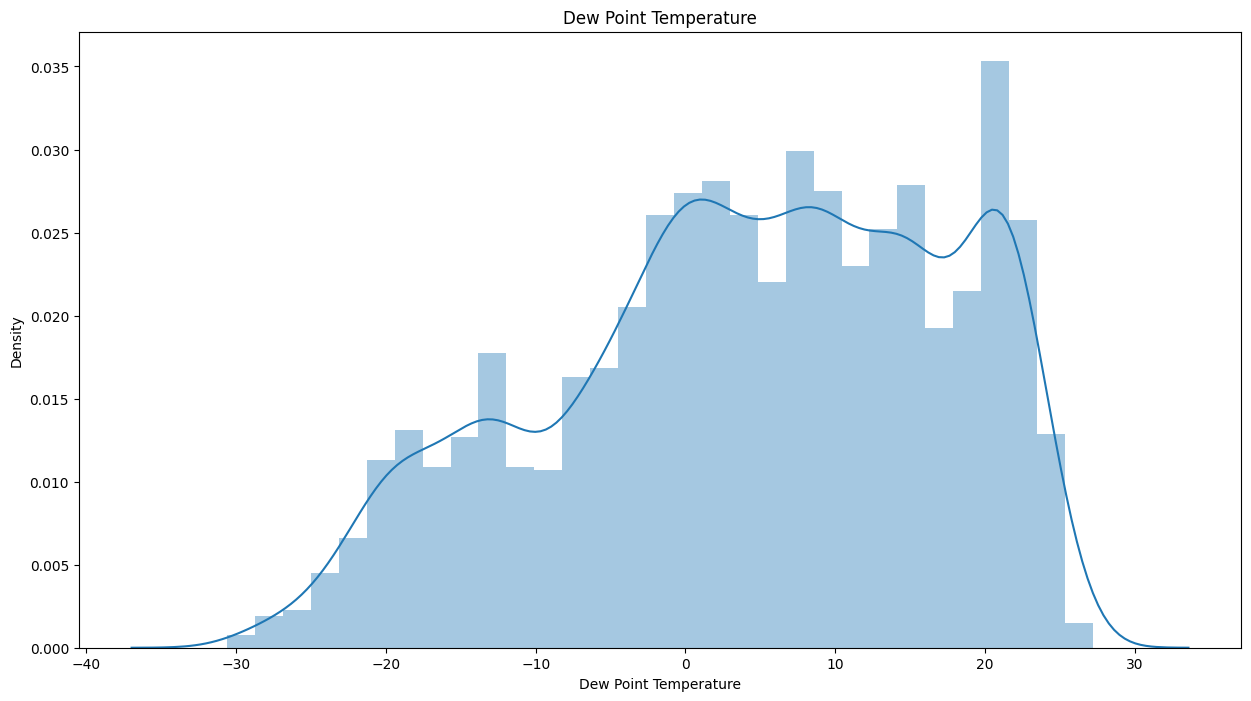

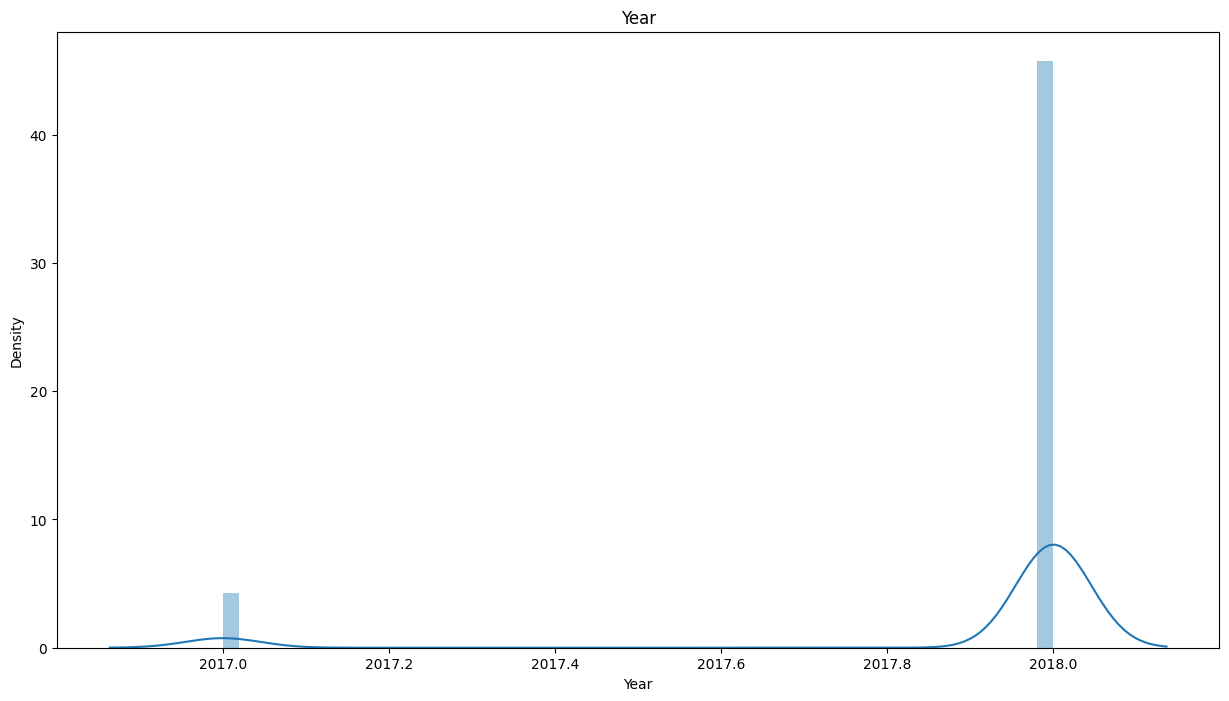

In [270]:
# Chart - 11 visualization code
for col in numerical_cols:
  if col not in ['Rented Bike Count']:
    plt.figure(figsize=(15,8))
    plt.title(col)
    sns.distplot(bike_data[col])
    plt.show()

##### 1. Why did you pick the specific chart?

- Distplot is a great choice to plot the data distribution.

##### 2. What is/are the insight(s) found from the chart?

- Solar radiation, Snowfall, Rainfall and Visibility are highly skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- It seems weather condition can affect the bike rent sales.

#### Chart - 12

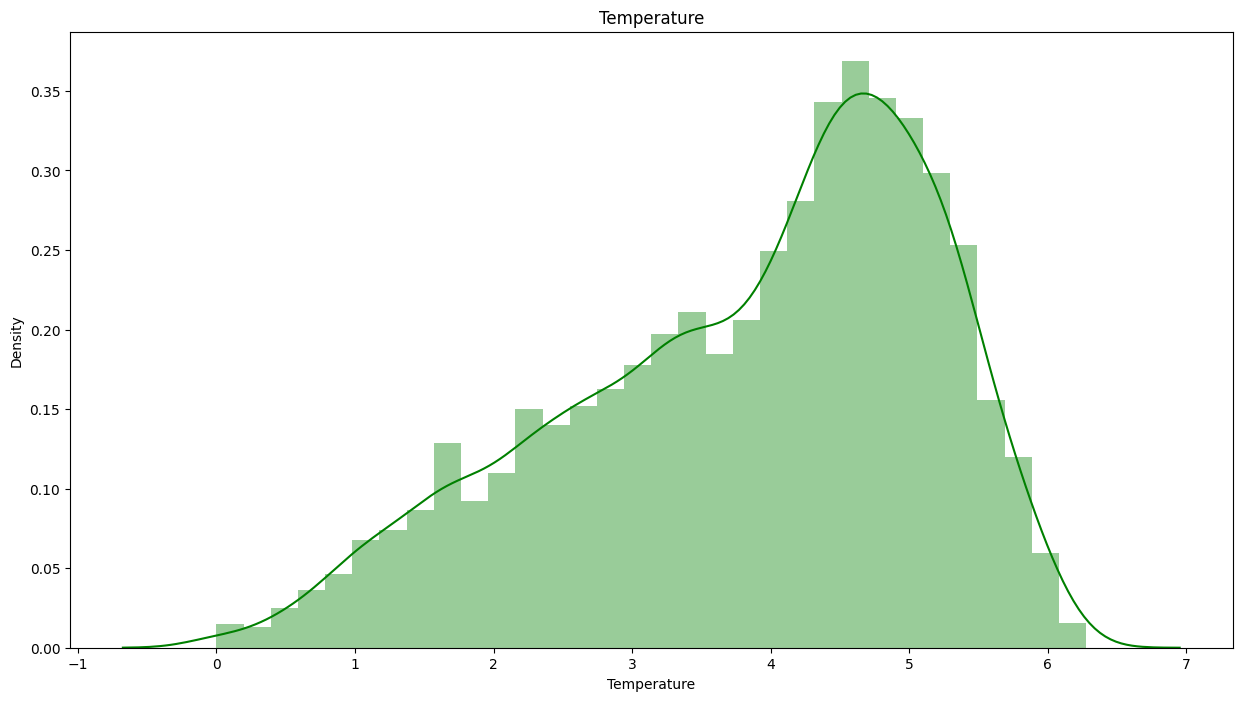

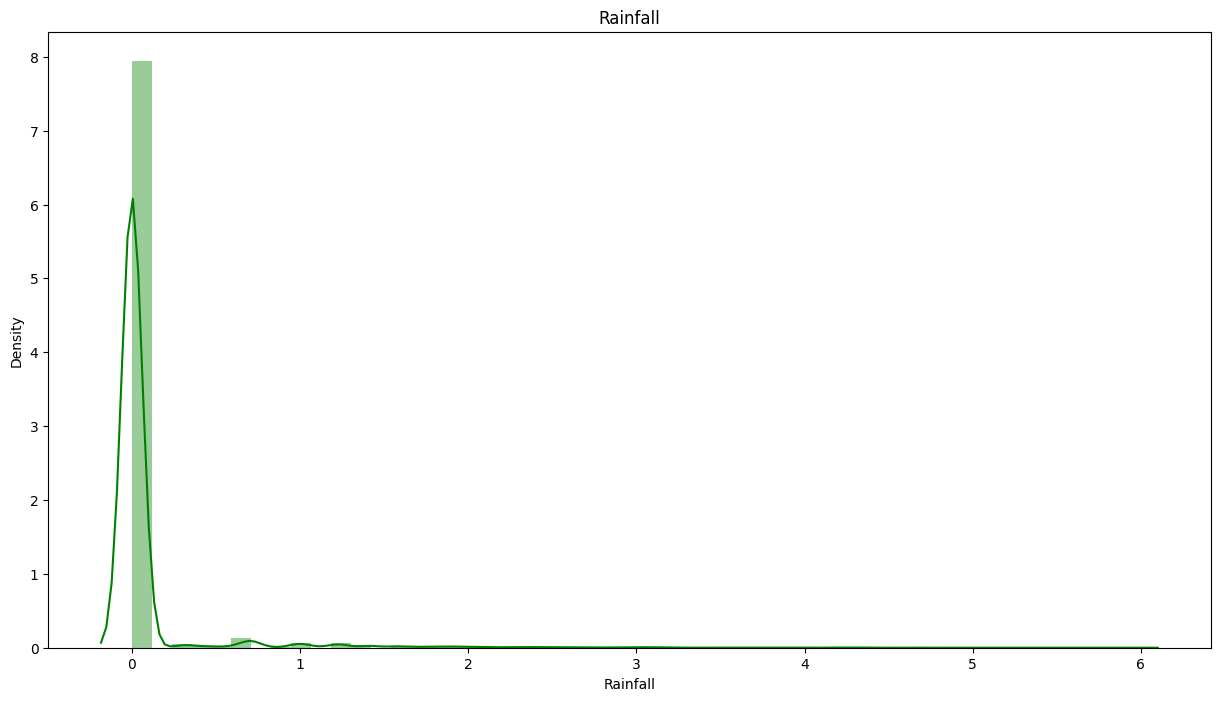

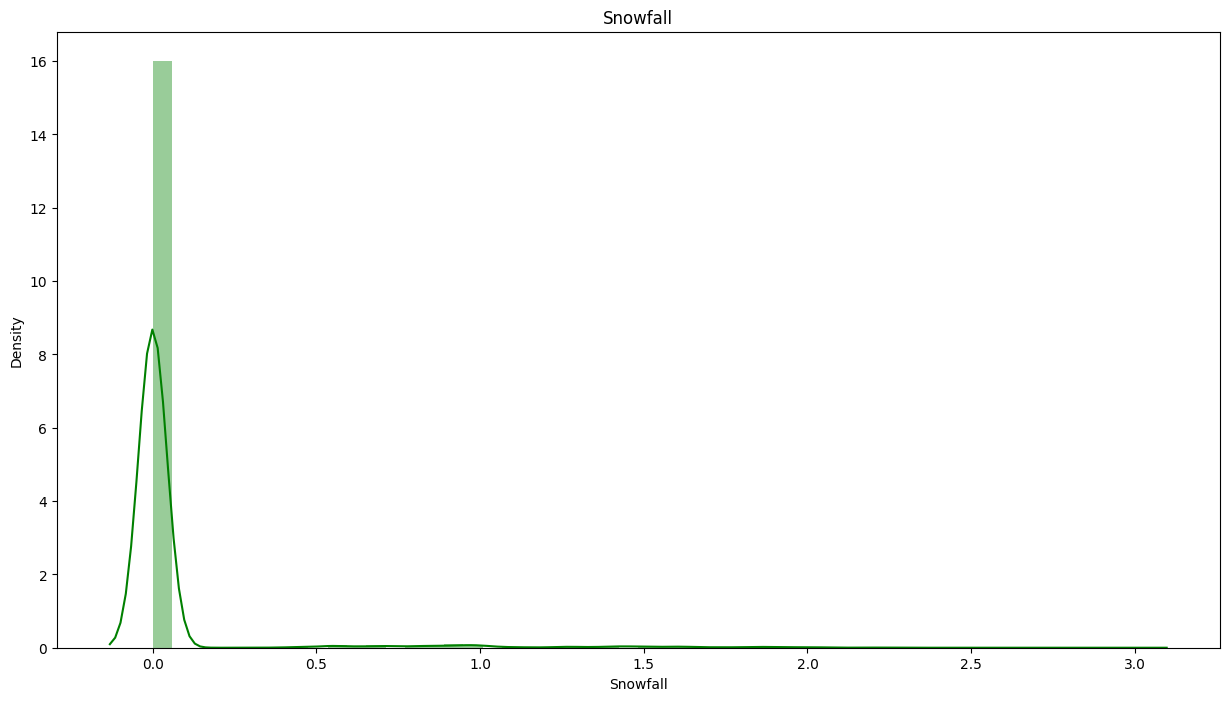

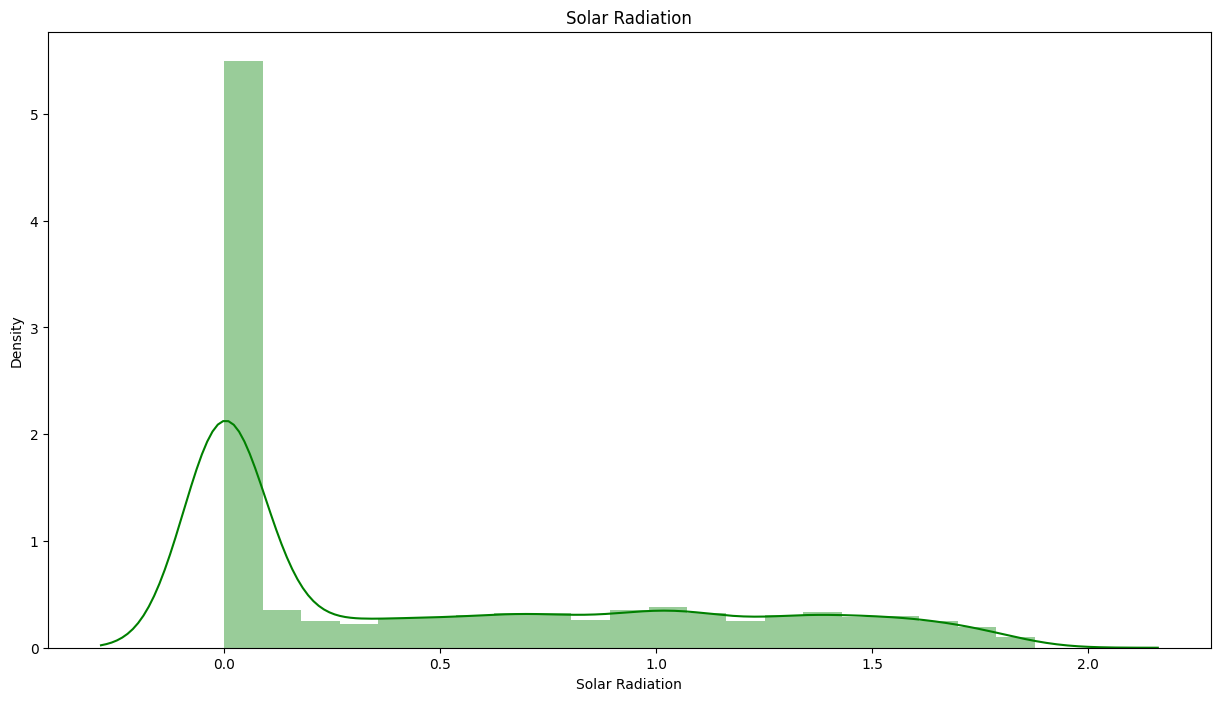

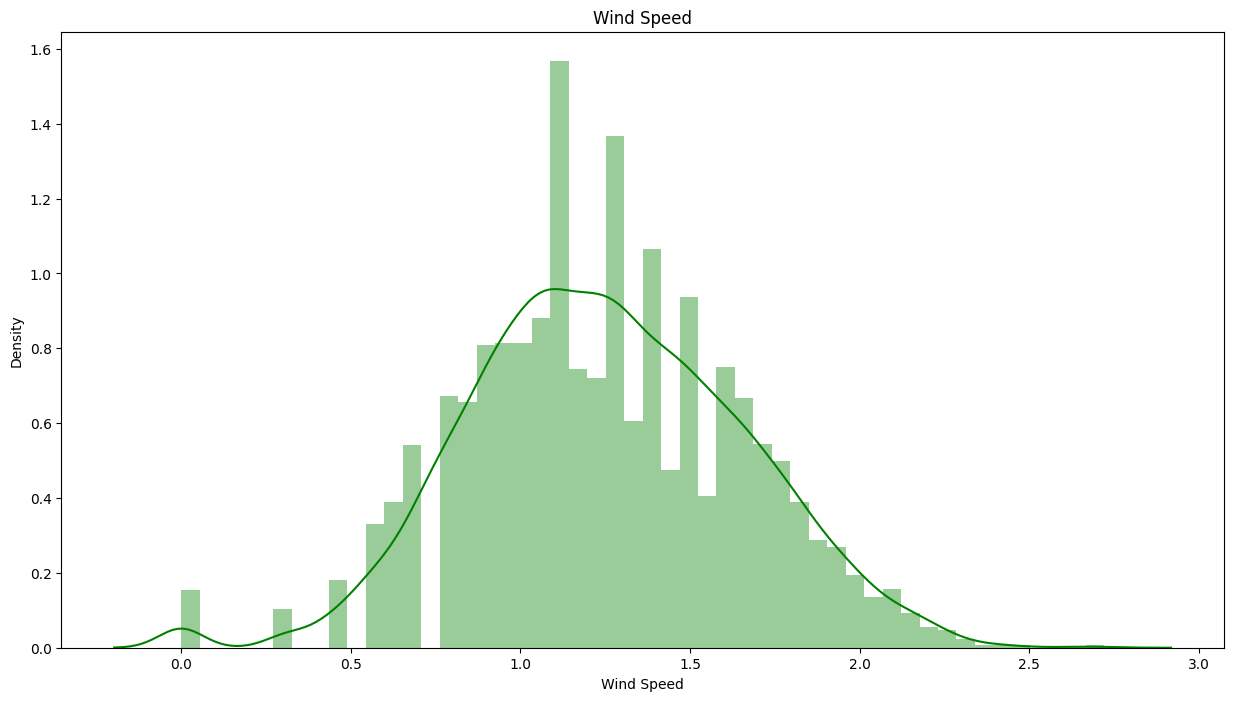

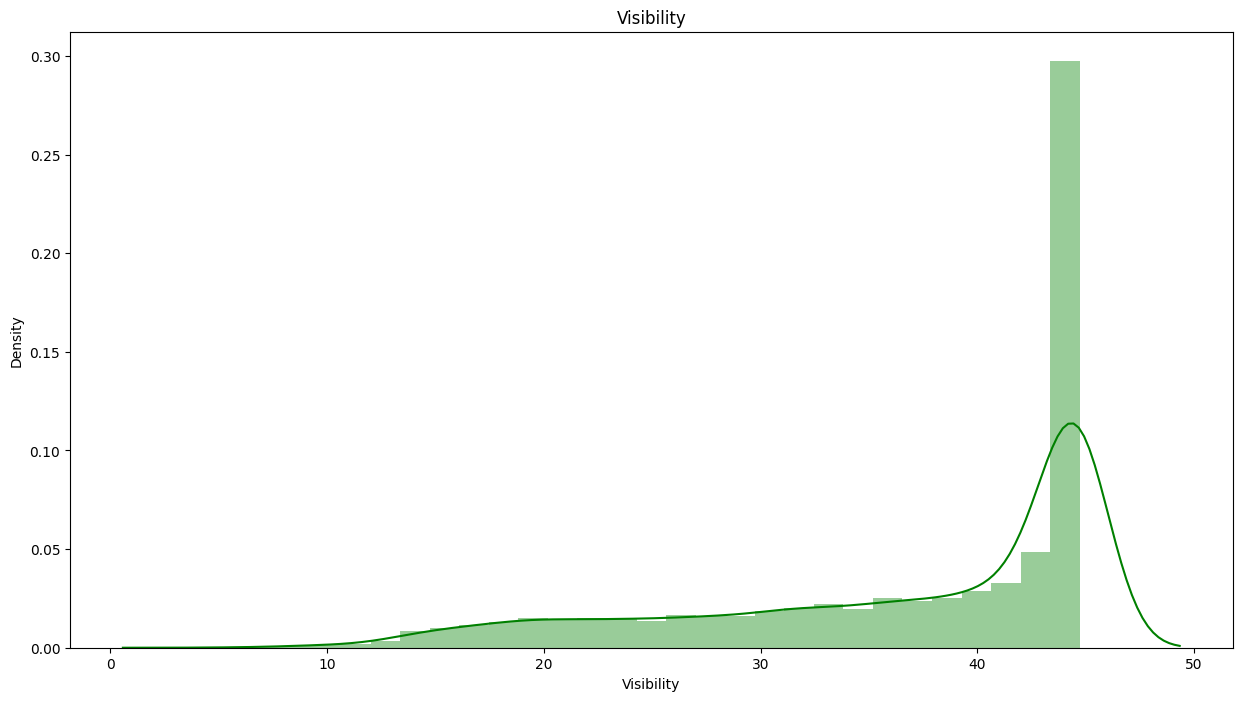

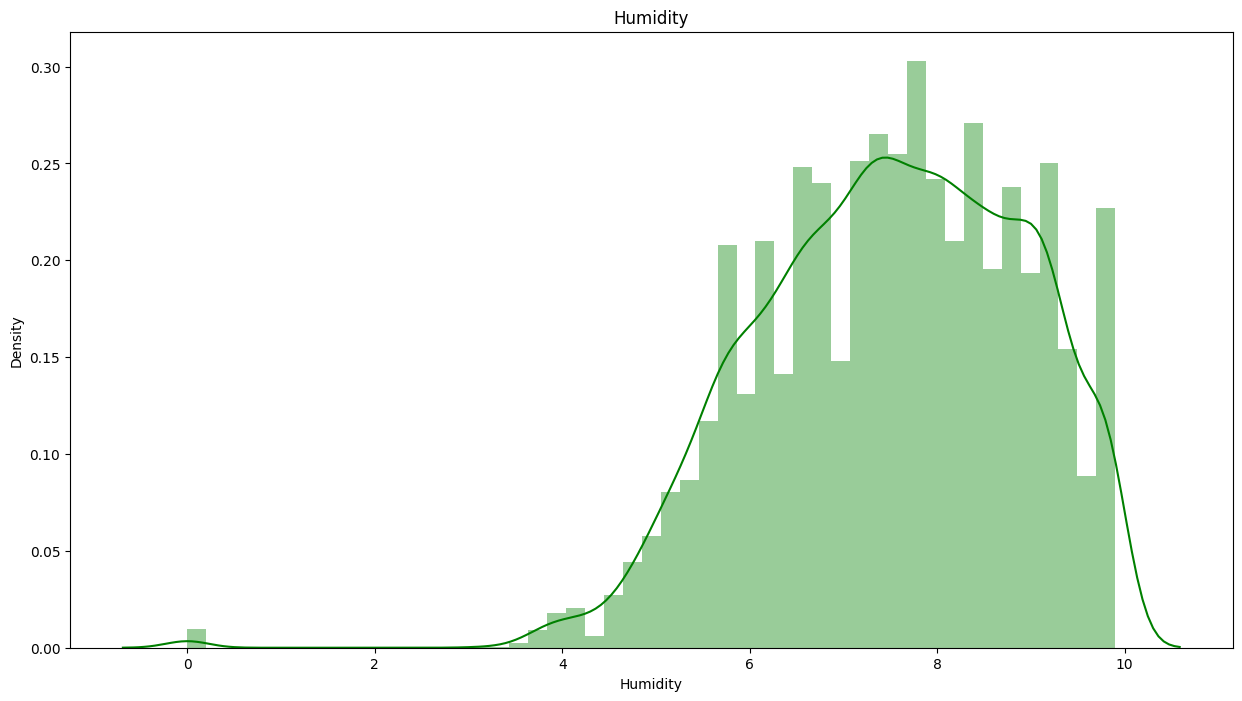

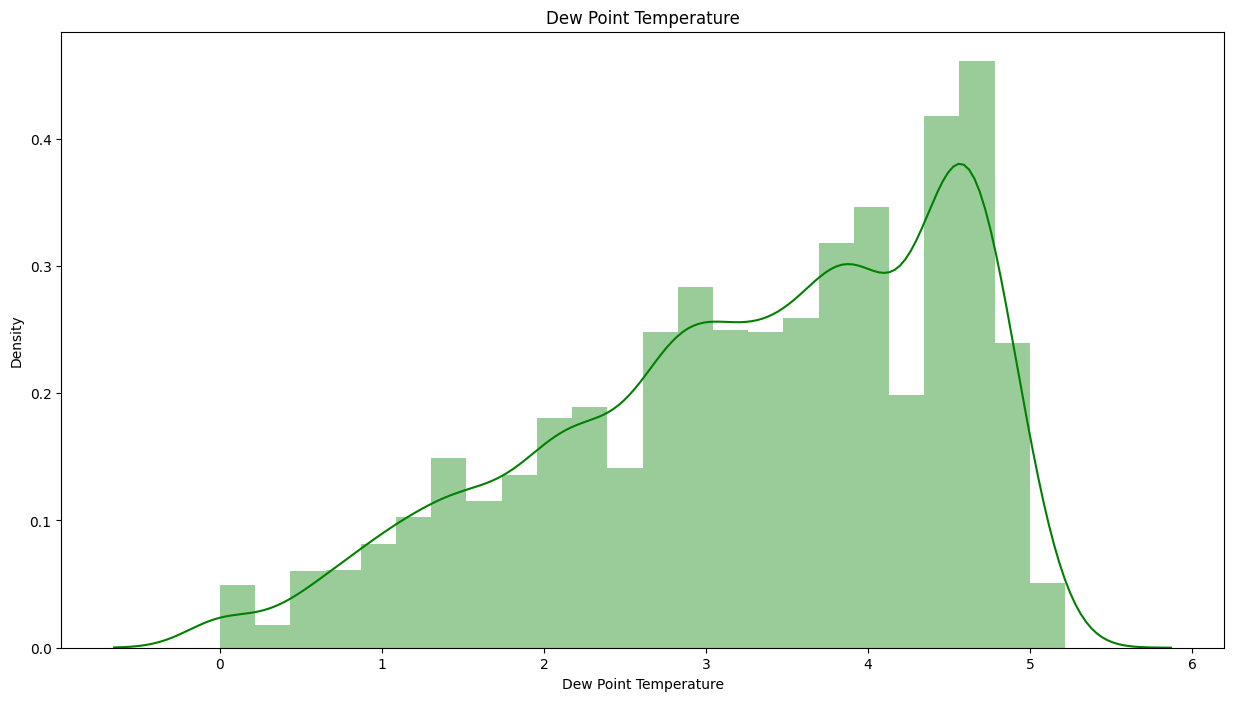

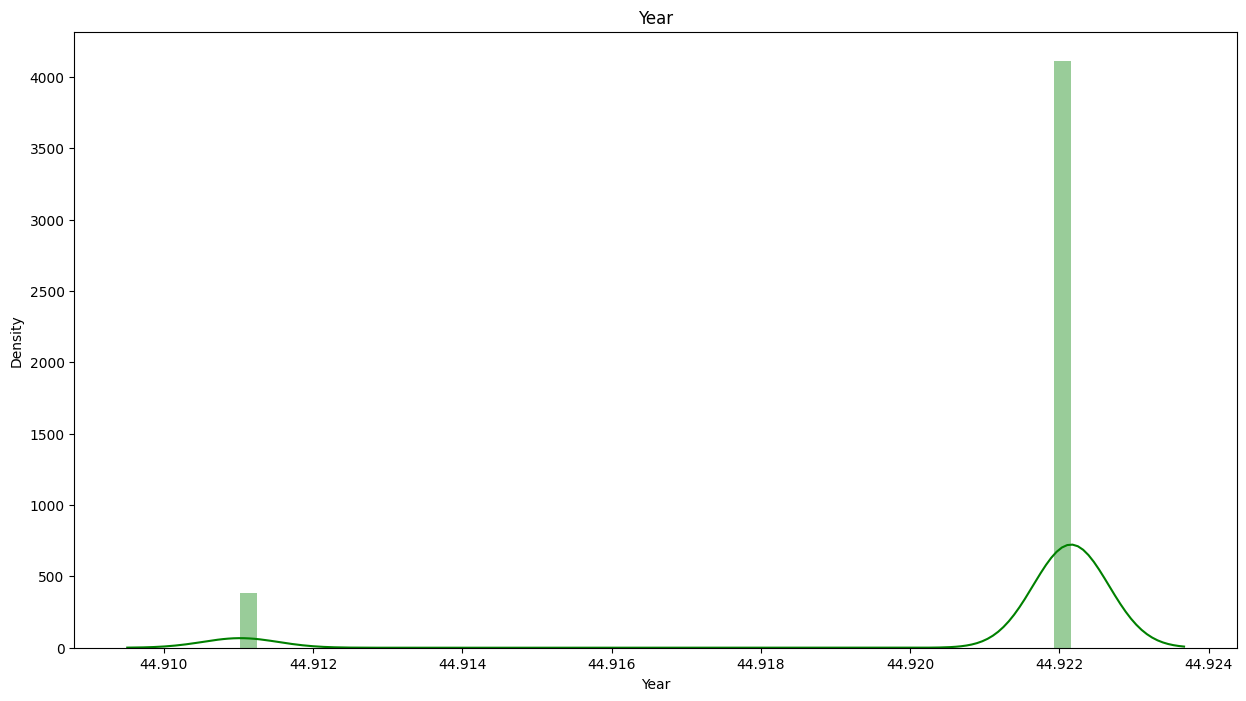

In [286]:
# Chart - 12 visualization code
for col in numerical_cols:
  if col not in ['Rented Bike Count']:
    plt.figure(figsize=(15,8))
    plt.title(col)
    sns.distplot(np.sqrt(bike_data[col]),color='g')
    plt.show()

##### 1. Why did you pick the specific chart?

- Distplot plots the data distribution in a way that is easy to interpret and understand.

##### 2. What is/are the insight(s) found from the chart?

Data distribution of following columns have shown improvements after normalization:

- Wind speed
- Dew point temperature
- Temperature
- Humidity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- These improvements after normalization can improve the model performance.

#### Chart - 13
- Bike Rent Count growth chart

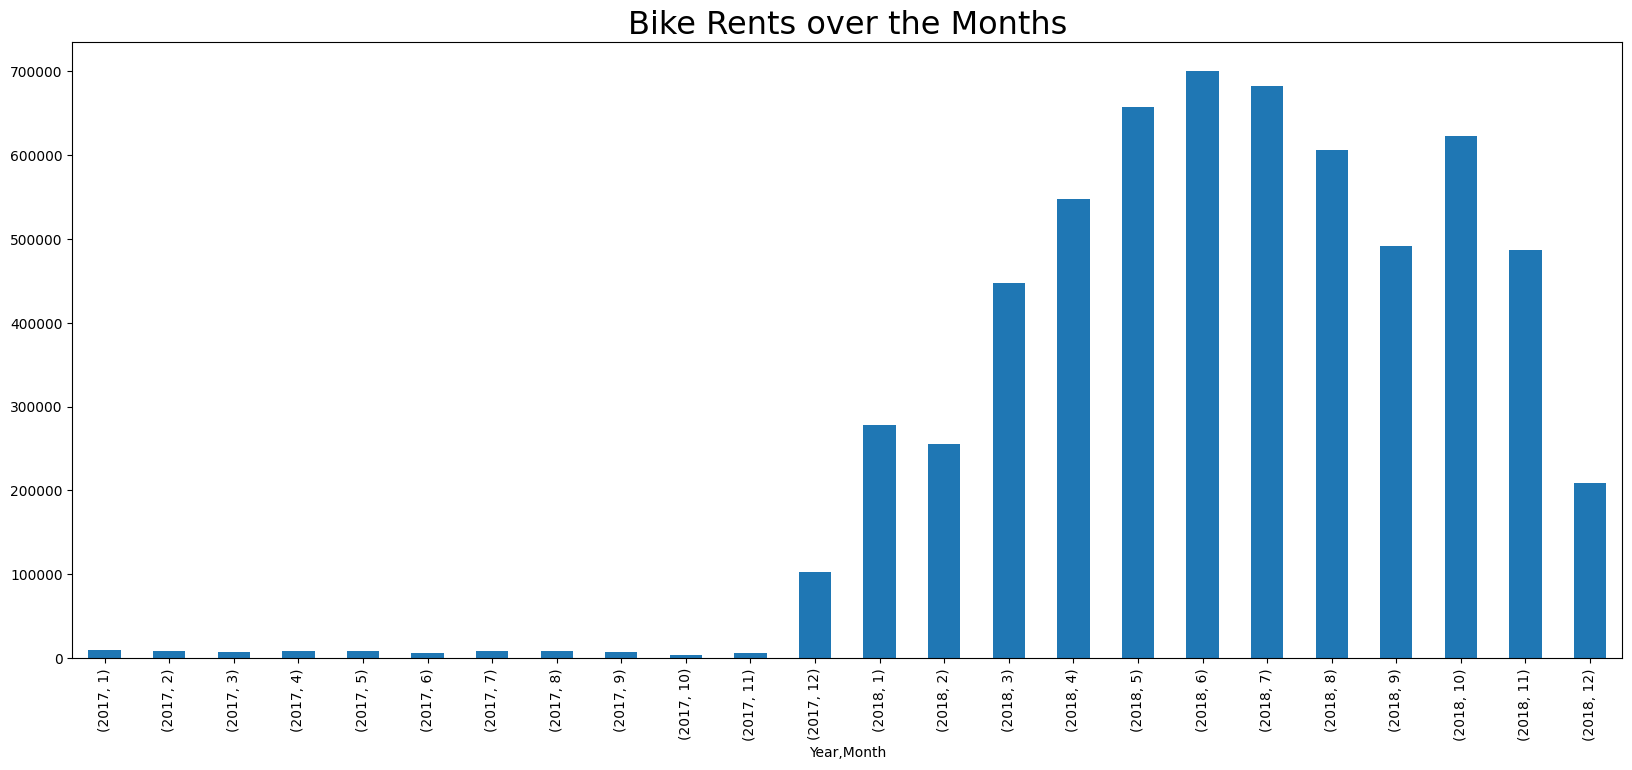

In [280]:
# Chart - 13 visualization code
year_month_rent_count = bike_data.groupby(['Year', 'Month'])['Rented Bike Count'].sum()
plt.rcParams['figure.figsize'] = (20, 8)
year_month_rent_count.plot.bar()
plt.title('Bike Rents over the Months',fontsize=23,y=1.0)
plt.show()

##### 1. Why did you pick the specific chart?

- A vertical bar chart is a good choice for this data because it shows the total number of bike rentals for each month

##### 2. What is/are the insight(s) found from the chart?

- The chart shows that the company had low bike rentals for the first 11 months of the year. However, there was a spike in rentals from December 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The company's sales remained flat for 11 months before finally showing signs of growth.

#### Chart - 14 - Correlation Heatmap

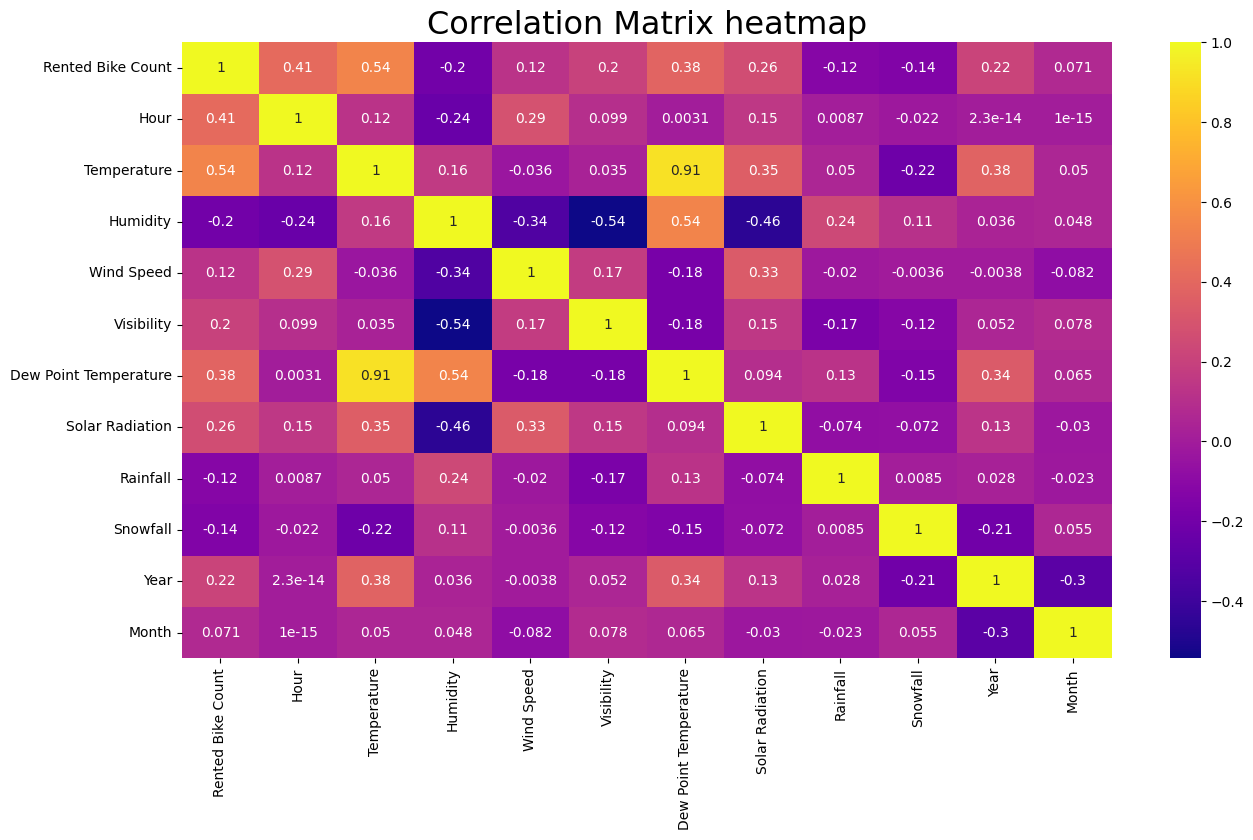

In [275]:
# Correlation Heatmap visualization code
corr_matrix = bike_data.corr()

# Plot heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap',fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- The corelation chart shows the relation between the two specific features

##### 2. What is/are the insight(s) found from the chart?

- The colser the value to +1 indicates that the two variables are positively correlated.

- The closer the value to -1 indicates the tow variables are negativly correlated.

- The closer the value towards 0 is less correlation between the two variables.

#### Chart - 15 - Pair Plot

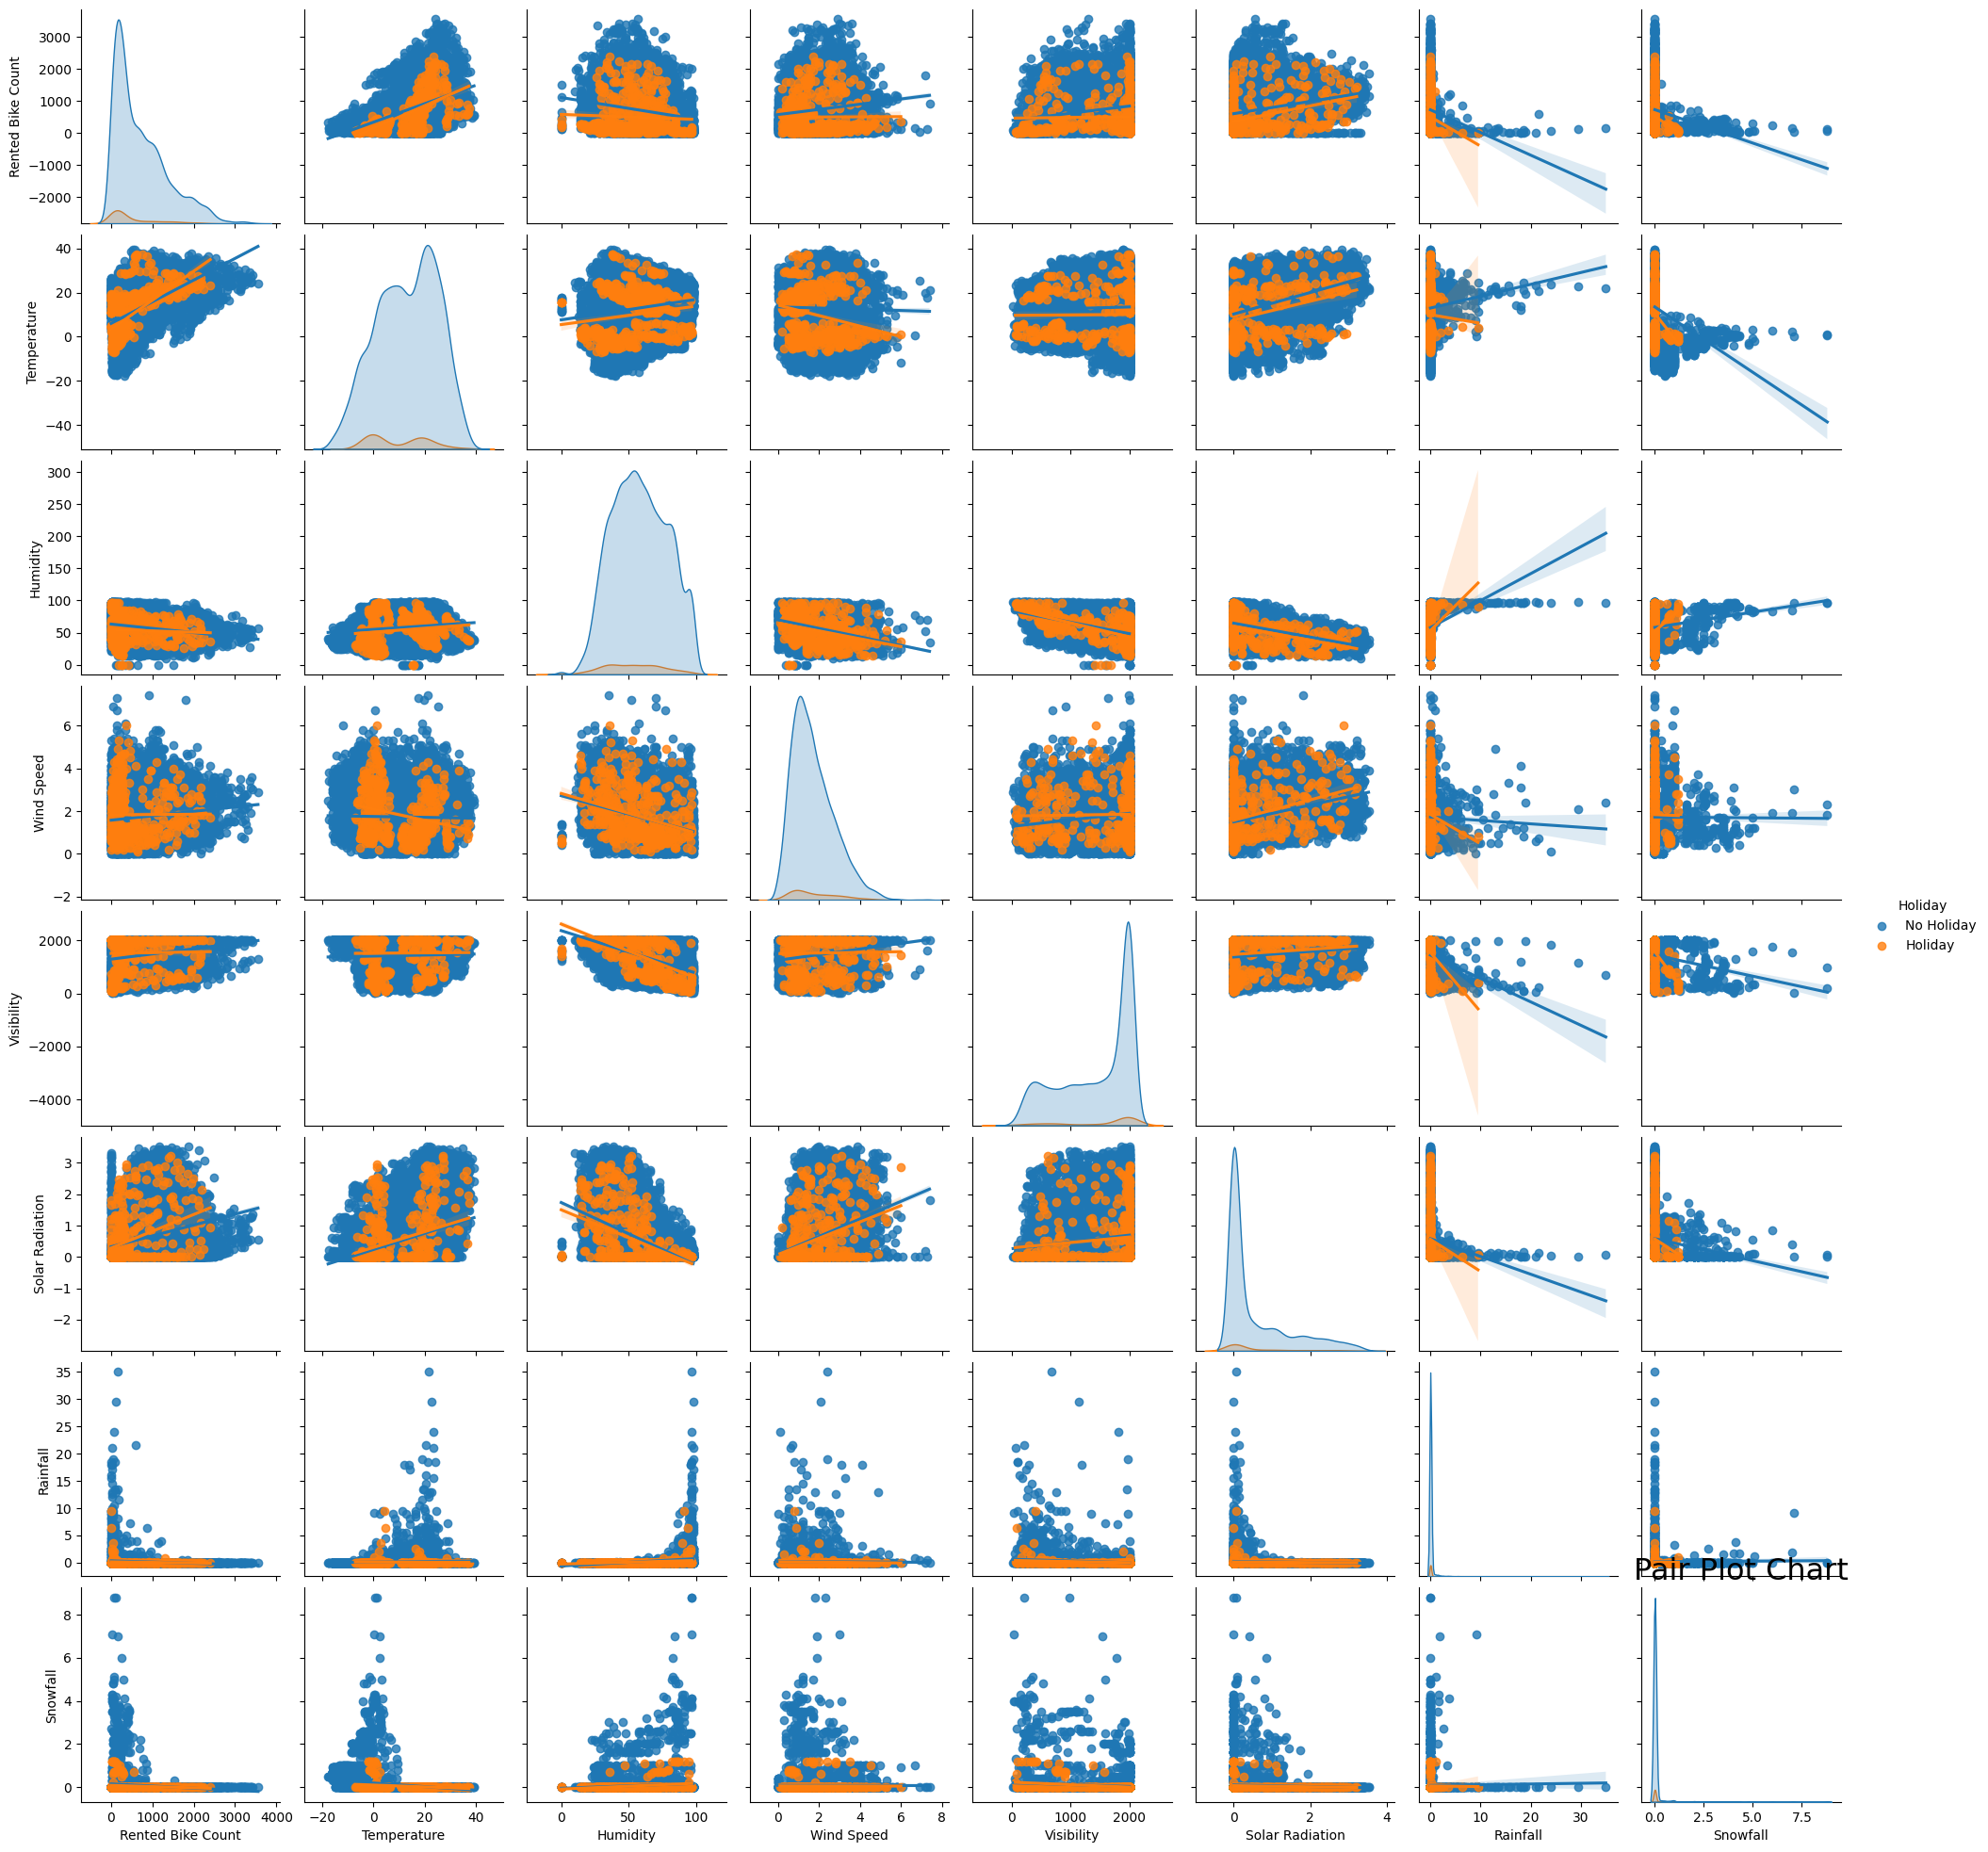

In [276]:
# Pair Plot visualization code
selected_features =['Rented Bike Count','Temperature', 'Humidity','Wind Speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Holiday']
pair_plot_df = bike_data[selected_features]

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot Chart',fontsize=23)
plt.show()

##### 1. Why did you pick the specific chart?

- Pair plots are used to show relationship between various variables

- Pair plots can also help explore the distribution of variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

- We see that there is a positive correlation beween wind speed and sloar radiation.

- Temperature and rented bike count are highly corellated.

- Humidity and solar radiation are negativly corelated.

- The diagonal plots show the kernel density estimate (KDE) plotted with respect to the same feature. It is noted that the diagonal plots do not follow the same scale as the off-diagonal plots.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [202]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [203]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [204]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [205]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [206]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [207]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [208]:
# Expand Contraction

#### 2. Lower Casing

In [209]:
# Lower Casing

#### 3. Removing Punctuations

In [210]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [211]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [212]:
# Remove Stopwords

In [213]:
# Remove White spaces

#### 6. Rephrase Text

In [214]:
# Rephrase Text

#### 7. Tokenization

In [215]:
# Tokenization

#### 8. Text Normalization

In [216]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [217]:
# POS Taging

#### 10. Text Vectorization

In [218]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [219]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [220]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [221]:
# Transform Your data

### 6. Data Scaling

In [222]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [223]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [224]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [225]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [226]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [227]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [228]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [229]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [230]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [231]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [232]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [233]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [234]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [235]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***